<h1 style='text-align:center;font-weight:bold;color:orange'>Customer Churn Prediction</h1>

**Questions**
- Definisi churn terkait dataset: Apakah churn di sini di bulan berikutnya atau sama sekali karena tidak ada unit waktu.
- Bisa abaikan outlier di dua kolom tidak?
- Kalo ambil F1 sebagai evaluation metric padahal Type II error-nya berkali-kali lipat lebih tinggi dibandingkan Type I error, masih masuk akal tidak? Khawatirnya kalo ambil recall aja, model bakal fokus kurang fokus sama Type I.

## **1 Introduction**
### **1.1 Context**
Customer churn, **a condition when a customer stops purchasing a product or service**, is a central issue in every industry, including e-commerce or online retail. Customer churn if not addressed properly will not only affect the brand perception but also reduce the company's revenue. A significant loss of customers for example can create the impression of declining quality of products or services provided by the company. In addition to perception of quality, customers who churn, especially due to their unsatisfaction, are likely to share their negative experience on social media, and hence, it will be more challenging for the brand to attract new customers to purchase their products. Despite unable to see the effect in an short term, brand perception caused by customer churn will eventually influence the company's revenue in the long run.

Financially, customer churn will affect the company in different ways either directly or indirectly. When a customer stop purchasing a product, the company will directly lose revenue. To make it more explicit, let us consider the following hypothetical scenario. When the company has 0% churn rate and average revenue per customer is USD 100 per month, the annual revenue is USD 1M for 10K customers. Nevertheless, the revenue will decrease into 900K for 10% churn rate (1K customers stopped buying from the company). This decrease in revenue will be getting worse if the churn rate is larger.

Second, the company will also need to increase the customer acquisition budget to, at the very least, balance the direct financial consequence due to the churn but the marketing will not only one who needs extraexpenses. Customer churn will demand different sections in the company to win back the customers and improve the customer experience, including R&D cost to experiment with user interface and customer service efforts to handle customer complaints.

### **1.2 Problem Statement**
Given the importance of this issue, our main business concern is **how the company can address the customer churn issue by <span style='color:red'>XX%</span> ~~to decrease the financial impacts~~** by both exploring the company's historical data and predicting the possibility of customers to churn. Analyzing historical data can provide an understanding of why customers churned in the past and can use the insights for data-driven decision making by the respective teams (e.g, Customer Success, Marketing, Product, Sales, and Finance) but the Customer Success team will be the most directly responsible team in the company for handling the churn as customer experience and churn reduction are their concerns. And for this reason, **the main stakeholder of the current project will be the Customer Success or Customer Experience team, especially the manager**. 

In addition, making a prediction on whether a customer will churn or not equips the Customer Success Manager to anticipate or develop strategies to improve the customer retention.

### **1.3 Objctives**
The main objectives of our project are twofold. 
- First, we aim to investigate the possible reasons for the churn, and the outcome of this objective is an analysis on Section 3 and a Tableau dashboard for the Customer Experience Manager to explore the causes on their own. From this analysis, the stakeholder can understand the possible reasons for past customers to churn and take necessary actions to mitigate the risk. While we can associate the churn with different factors in the data, the direct contributing factors of the churn remains an open question due to inavailability of data concerning customer's reason for leaving (e.g., via an open-ended survey). 
- Second, our objective is to build a classification model to predict whether a current customer will stop buying the company's products (churn) or not (not churn). After getting the prediction, we proceed identifying what factors contribute to the churn by investigating the predictitions. The model therefore can be used to flag customers with high probability of churn, and enables the stakeholders to proactively mitigate the possibility of churn by identifying at-risk customers. Besides, as the model can identify at-risk customers, the stakeholder can also prioritize outreach according to predicted churn risk so they can be more efficient in allocating resources.

### **1.4 Analytical Approach**
- **Step-1**: Perform a diagnostic analysis to understand the possible reasons for churns in historical data. 
- **Step-2**: Build a classifier to predict customer churn (`1` for "Churn" and `0` for "Not Churn").
- **Step-3**: Identify most influential factors contributing to the churn predictions.

### **1.5 Metrics**
As we have two different objectives, our project will involve different metrics for different purposes. For the data analysis, our main metric will be churn rate, and will be supplemented by customer satisfaction score (C-SAT) as a supporting metric. And for the predicting customer churn, let us consider the following two possible misclassifications made by the classification model. The business impacts of each error will guide us to determine which metric(s) is more suitable for the company's business case.
- **Type I Error (False Positive)**: This error happens when the model predicts a customer to churn when they actually don't. This misclassification leads to unnecessary retention actions, especially providing discounts for next purchase. In e-commerce industry (global), the average order value (AOV) is USD 114 and the average discount rate of 13.8% ([OCBD, 2023](https://ecommercedb.com/benchmarks/ww/all)). With these values, the company spends USD 15,732 per 1000 misclassifications per month.
- **Type II Error (False Negative)** A model predicts a customer to not churn when actually they do. Making a type II error leads to revenue loss as the company will lose users who contribute to their revenue. According to [Statista (2024)](hhttps://www.statista.com/statistics/1319571/retail-media-ad-arpu-usa/), the average revenue per user (ARPU) is USD 1,620 for e-commerce (worldwide). As a consequence, for every 1000 mistakes, the model will cost USD 1.62 milion per month. This significant revenue loss underscores the criticality of the prevention.

As the financial cost of the type II error is multiple times higher than the type I, we decide to utilize recall as the evaluation metric for our classification model. Recall measures the proportion of actual positive cases (customer who churns) predicted by the model. In other words, this metric seeks to answer, "From all customers who actually churned, how many cases did the model predict would churn?" In its interpretation, high recall means the model performs well at capturing positive instances, and when the score is high, the type II error is low as the have an inverse relationship. As a consequence, by capturing most positive cases (Churn = 1), we can reduce the posssibility of significant financial cost due to undetected churns.

### **1.5 Dataset**
The dataset used here belongs to an online e-commerce company on customer churn. The dataset which was in an Excel file format was obtained from [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data). This file consists of two sheets, `Data Dict` (information about each column in the dataset) and `E Comm` (the dataset). At glance, we can see that the dataset contains customer demographics and behaviors.
- `CustomerID`: Unique customer ID
- `Churn`: Churn status
- `Tenure`: Tenure of customer in organization
- `PreferredLoginDevie`: Preferred login device of customer
- `CityTier`: City tier
- `WarehouseToHome`: Distance between warehouse to home of customer
- `PreferredPaymentMode`: Preferred payment method of customer
- `Gender`: Gender of customer
- `HourSpendOnApp`: Number of hours spent on mobile app or website
- `NumberOfDeviceRegistered`: Total number of devices registered by a customer
- `PreferedOrderCat`: Preferred order category of customer in last month
- `SatisfactionScore`: Satisfaction score of customer on service
- `MaritalStatus`: Marital status of customer
- `NumberOfAddress`: Total number of address of customer
- `Complain`: Complaint raised in last month
- `OrderAmountHikeFromlastYear`: Percentage of increases in order from last year
- `CouponUsed`: Total number of coupon has been used in last month
- `DaySinceLastOrder`: Day since last order by customer
- `CashbackAmount`: Average cashback in last month

Kindly note whether or not all variables will be used for a data analysis and data modeling will be determined based on the findings during the data exploration. Variables with moderate to high correlations, for example, will be excluded for the next stages to avoid problems in the modeling phase, especially when using logistic regression. Multicollinearity can pose a challenge when interpreting the contribution of each predictor to the prediction.

## **2 Data Preparation**
### **2.1 Initial Inspection**

In [153]:
import pandas as pd                                                         # for data wrangling
import numpy as np                                                          # for numerical operations
from scipy.stats import skew, kurtosis, kstest, shapiro                     # for data distribution
import warnings                                                             # for disabling warnings
warnings.filterwarnings("ignore", category=UserWarning)                     # for disabling warnings
import matplotlib as mpl                                                    # for data visulization
warnings.filterwarnings("ignore",                                           
                        category=mpl.MatplotlibDeprecationWarning)          # for disabling matplotlib warnings
import matplotlib.pyplot as plt                                             # for data visualization
plt.style.use('seaborn')                                                    # for setting style in datviz
import seaborn as sns                                                       # for data visualization 
import missingno as msno                                                    # for checking missing data (REMOVE)
from scipy import stats                                                     # for statistical tests
from sklearn.experimental import enable_iterative_imputer                   # for data imputation
from sklearn.impute import IterativeImputer                                 # for data imputation
from scipy.stats.mstats import winsorize                                    # for outlier handling
from pyampute.exploration.mcar_statistical_tests import MCARTest            # for missing value check
from scipy.stats import mannwhitneyu                                        # for testing group difference

In [154]:
# import dataset
data = pd.read_excel('../data/E Commerce Dataset.xlsx', sheet_name=1)

As we will inspect our dataframe multiple times for evaluating the quality of data preprocessing outputs, we build a function to perform basic sanity check which will cover variable names, number of records, data types, missing value rates, duplicate rates, unique values, and samples.

In [155]:
# create function to inspect df
def inspect_dataframe(df):
    print(f'The dataframe contains {df.shape[0]} rows and {df.shape[1]} cols.')
    print(f"- {len(df.select_dtypes(include='number').columns)} are numeric cols")
    print(f"- {len(df.select_dtypes(include='O').columns)} are object cols")
    summary = {
        'ColumnName': df.columns.values.tolist(),
        'Nrow': df.shape[0],
        'DataType': df.dtypes.values.tolist(),
        'NAPct': (df.isna().mean() * 100).round(2).tolist(),
        'DuplicatePct': (df.duplicated().sum()/len(df)*100).round(2),
        'UniqueValue': df.nunique().tolist(),
        'Sample': [df[col].unique() for col in df.columns]
    }
    return pd.DataFrame(summary)

In [156]:
# perform inspection
inspect_dataframe(data)

The dataframe contains 5630 rows and 20 cols.
- 15 are numeric cols
- 5 are object cols


ColumnName  Nrow DataType  NAPct  DuplicatePct  \
0                    CustomerID  5630    int64   0.00           0.0   
1                         Churn  5630    int64   0.00           0.0   
2                        Tenure  5630  float64   4.69           0.0   
3          PreferredLoginDevice  5630   object   0.00           0.0   
4                      CityTier  5630    int64   0.00           0.0   
5               WarehouseToHome  5630  float64   4.46           0.0   
6          PreferredPaymentMode  5630   object   0.00           0.0   
7                        Gender  5630   object   0.00           0.0   
8                HourSpendOnApp  5630  float64   4.53           0.0   
9      NumberOfDeviceRegistered  5630    int64   0.00           0.0   
10             PreferedOrderCat  5630   object   0.00           0.0   
11            SatisfactionScore  5630    int64   0.00           0.0   
12                MaritalStatus  5630   object   0.00           0.0   
13              NumberOfAddress  5630    int64   0.00           0.0   
14                     Complain  5630    int64   0.00           0.0   
15  OrderAmountHikeFromlastYear  5630  float64   4.71           0.0   
16                   CouponUsed  5630  float64   4.55           0.0   
17                   OrderCount  5630  float64   4.58           0.0   
18            DaySinceLastOrder  5630  float64   5.45           0.0   
19               CashbackAmount  5630  float64   0.00           0.0   

    UniqueValue                                             Sample  
0          5630  [50001, 50002, 50003, 50004, 50005, 50006, 500...  
1             2                                             [1, 0]  
2            36  [4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1...  
3             3                    [Mobile Phone, Phone, Computer]  
4             3                                          [3, 1, 2]  
5            34  [6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ...  
6             7  [Debit Card, UPI, CC, Cash on Delivery, E wall...  
7             2                                     [Female, Male]  
8             6                [3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]  
9             6                                 [3, 4, 5, 2, 1, 6]  
10            6  [Laptop & Accessory, Mobile, Mobile Phone, Oth...  
11            5                                    [2, 3, 5, 4, 1]  
12            3                        [Single, Divorced, Married]  
13           15  [9, 7, 6, 8, 3, 2, 4, 10, 1, 5, 19, 21, 11, 20...  
14            2                                             [1, 0]  
15           16  [11.0, 15.0, 14.0, 23.0, 22.0, 16.0, 12.0, nan...  
16           17  [1.0, 0.0, 4.0, 2.0, 9.0, 6.0, 11.0, nan, 7.0,...  
17           16  [1.0, 6.0, 2.0, 15.0, 4.0, 7.0, 3.0, 9.0, nan,...  
18           22  [5.0, 0.0, 3.0, 7.0, 2.0, 1.0, 8.0, 6.0, 4.0, ...  
19         2586  [159.93, 120.9, 120.28, 134.07, 129.6, 139.19,...

**Note**
- The dataset contains 5630 rows and 20 columns, consisting 5 object columns and 15 numerical columns. The 5 object cols will later need to be represented in the form of numerical format so they can be modeled together with the rest columns.
- No duplicates were found in the dataset so no treatments are needed.
- Missing values found in 7 columns, namely `Tenure` (4.69%), `WarehouseToHome` (4.46%), `HourSpendOnApp` (4.53%), `OrderAmountHikeFromlastYear` (4.71%), `CouponUsed` (4.55%), `OrderCount` (4.58%), and `DaySinceLastOrder` (5.45%). These columns should be investigated further to understand the mechanisms of the missingness and what treatment is appropriate each condition.

In [157]:
# get statistical summary for numerical var
data.describe().round(2).transpose()

count      mean      std      min       25%  \
CustomerID                   5630.0  52815.50  1625.39  50001.0  51408.25   
Churn                        5630.0      0.17     0.37      0.0      0.00   
Tenure                       5366.0     10.19     8.56      0.0      2.00   
CityTier                     5630.0      1.65     0.92      1.0      1.00   
WarehouseToHome              5379.0     15.64     8.53      5.0      9.00   
HourSpendOnApp               5375.0      2.93     0.72      0.0      2.00   
NumberOfDeviceRegistered     5630.0      3.69     1.02      1.0      3.00   
SatisfactionScore            5630.0      3.07     1.38      1.0      2.00   
NumberOfAddress              5630.0      4.21     2.58      1.0      2.00   
Complain                     5630.0      0.28     0.45      0.0      0.00   
OrderAmountHikeFromlastYear  5365.0     15.71     3.68     11.0     13.00   
CouponUsed                   5374.0      1.75     1.89      0.0      1.00   
OrderCount                   5372.0      3.01     2.94      1.0      1.00   
DaySinceLastOrder            5323.0      4.54     3.65      0.0      2.00   
CashbackAmount               5630.0    177.22    49.21      0.0    145.77   

                                  50%       75%       max  
CustomerID                   52815.50  54222.75  55630.00  
Churn                            0.00      0.00      1.00  
Tenure                           9.00     16.00     61.00  
CityTier                         1.00      3.00      3.00  
WarehouseToHome                 14.00     20.00    127.00  
HourSpendOnApp                   3.00      3.00      5.00  
NumberOfDeviceRegistered         4.00      4.00      6.00  
SatisfactionScore                3.00      4.00      5.00  
NumberOfAddress                  3.00      6.00     22.00  
Complain                         0.00      1.00      1.00  
OrderAmountHikeFromlastYear     15.00     18.00     26.00  
CouponUsed                       1.00      2.00     16.00  
OrderCount                       2.00      3.00     16.00  
DaySinceLastOrder                3.00      7.00     46.00  
CashbackAmount                 163.28    196.39    324.99

**Note**
- What is apparent is column `Tenure`, `WarehouseToHome`, `DaySinceLastOrder`, and `CasbackAmount` contain outliers as the max value far greater than the 75% values. For instance, the Q3 (75% percentile) variable `WarehouseToHome` (the distance between the company's warehouse to the customer's house) is 20 unit and the max value is more than 6x of the Q3. The hige difference indicates the presence of outliers.
- However, it is important to remember this is just an initial inspection. We will conduct more tests to verify if they are outliers, and whether they are normal in the business context.

### **2.2 Check Distribution of Data**

Data distribution check should be firstly done as investigating the mechanisms of missing data will require a statistical test. The outcome of the distribution check is therefore to inform what statistical test should be chosen based on the characteristic of the data.

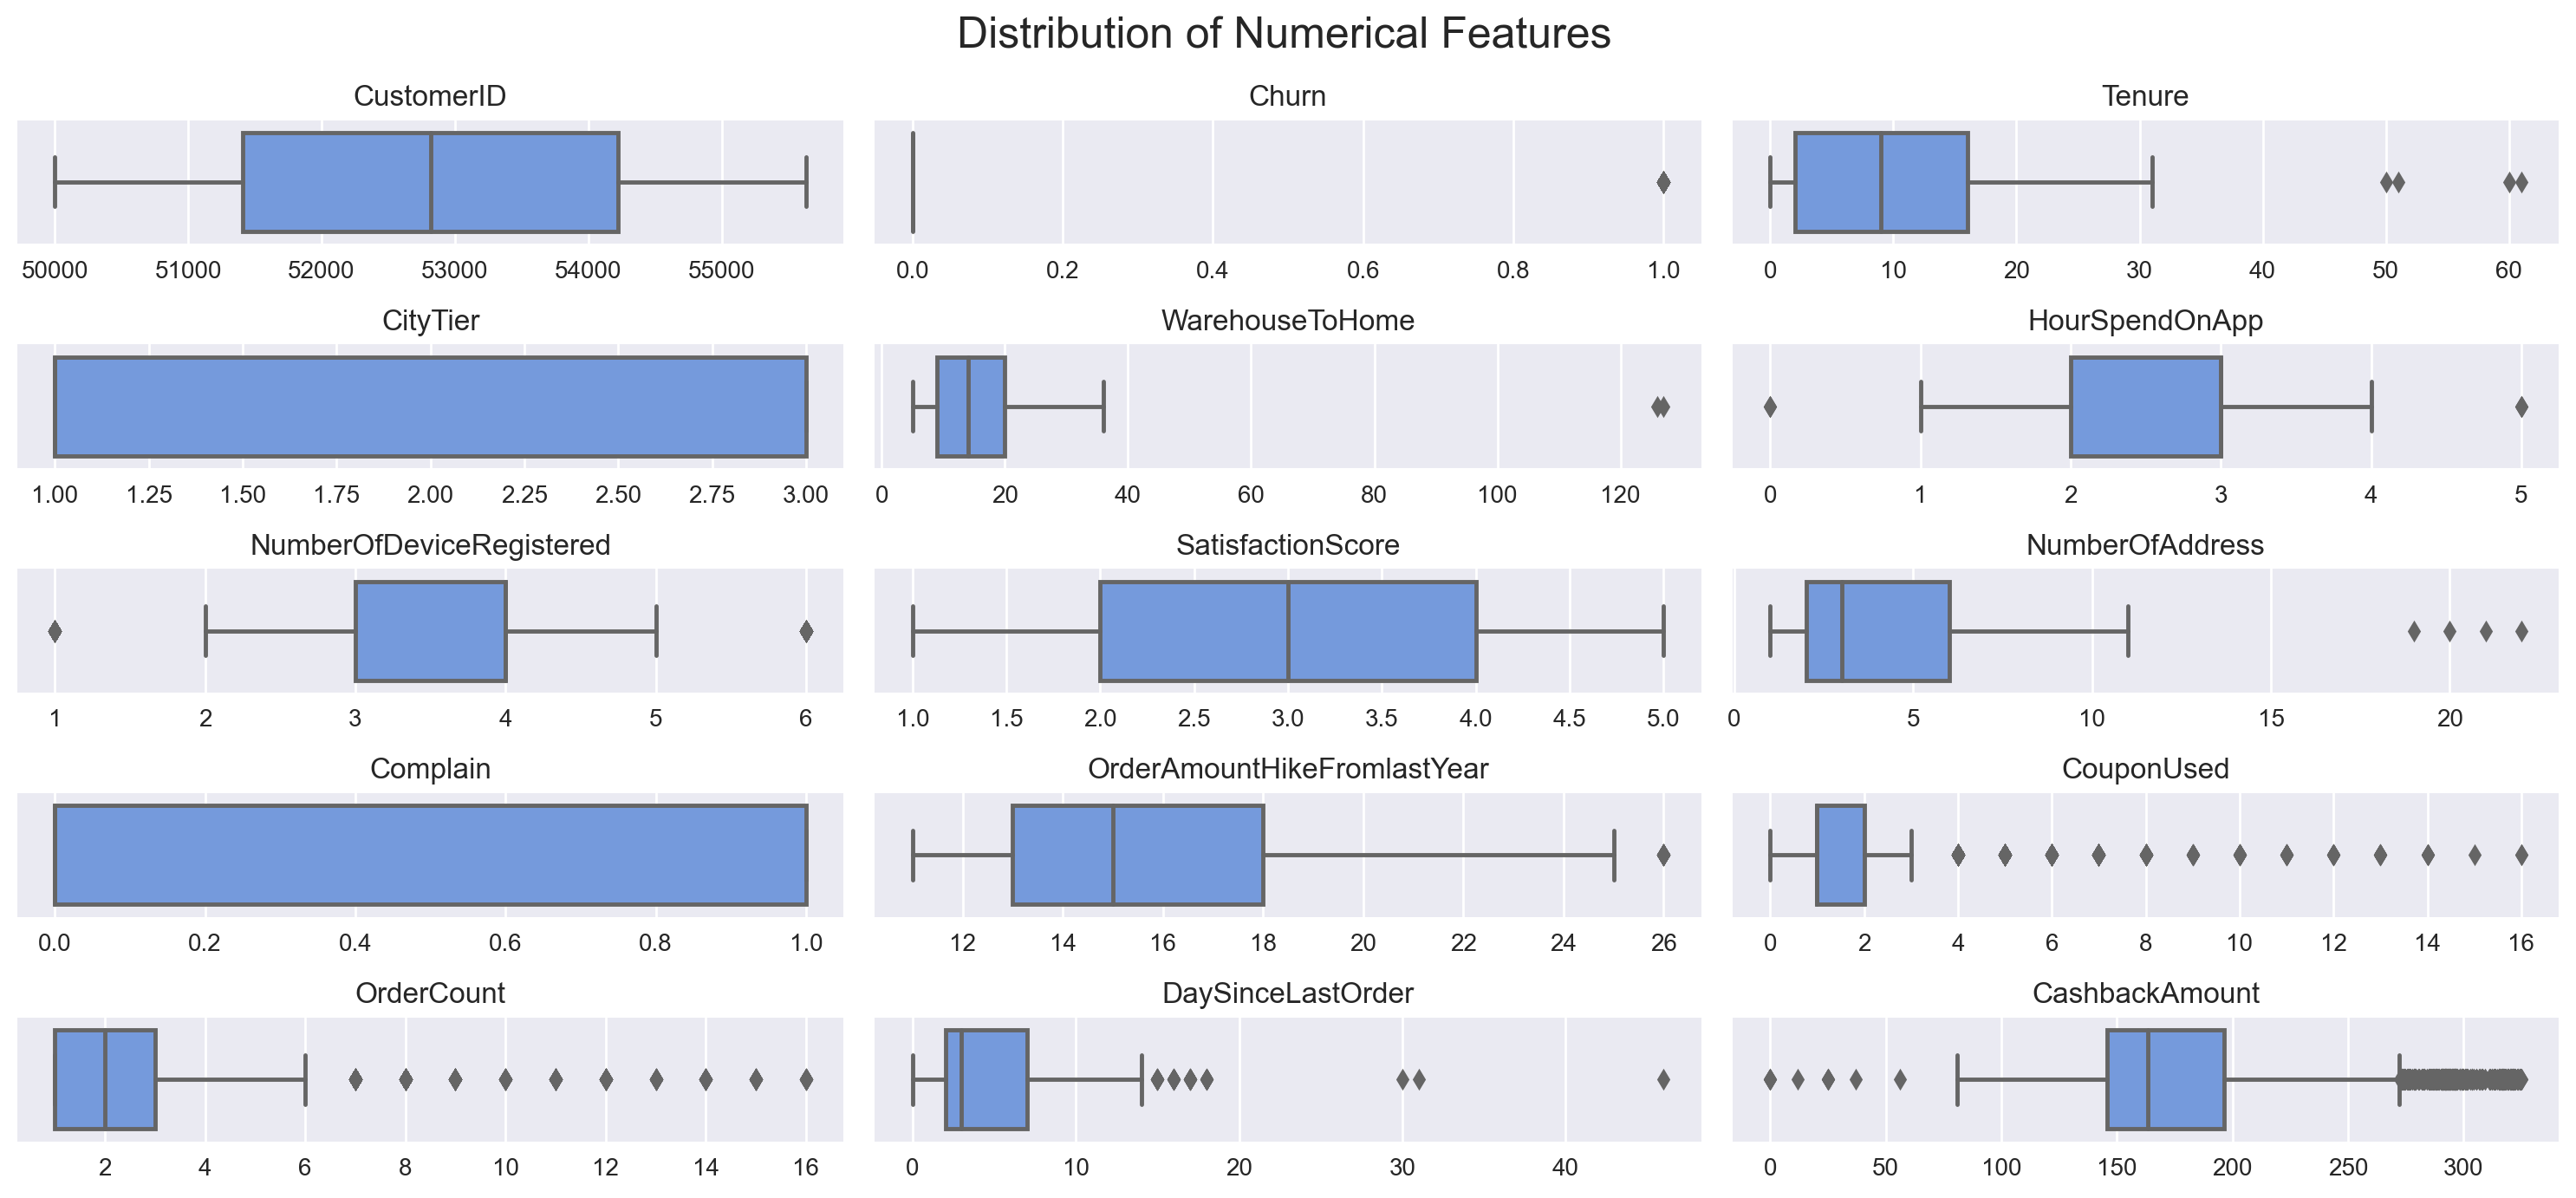

In [158]:
# define num cols
numerical_columns = data.select_dtypes(include='number')

# setup up figure size
plt.figure(figsize=(15, 7), dpi=200)
plt.suptitle('Distribution of Numerical Features', fontsize=18)

# check outliers using boxplots
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data[col], color='cornflowerblue', orient='v')
    plt.title(f'{col}')
    plt.xlabel(None)

plt.tight_layout()
plt.show()

**Note**: 
- In general, the data in the majority of columns, except for `SatisfactionScore` and `CustomerID` are not normally distributed. In addition to this general insight, most variables are also positively skewed as they have longer tails on the right side of the distributions.
    - In more specific, the positive skewness in `Tenure` indicates that customers tend to have relatively short tenure but there are some with long one. This can be seen by the position of the boxplot tending on the left side.
    - As seen on `HourSpendOnApp`, customers have varying levels of engagement due to the wide spread of the data. Here, outliers are present in both below the 25% percentile and above the 75% percentile, meaning that while there are some customers use the app for long time period, some others open the app in a very short time.
    - Data in `CashbackAmount` is slightly more skewed to the right despite the presence of outliers in in both sides (left and right). But it remains unclear how many outliers this variable. Furthermore, it seems the high amount of cashback some customers got is due to their purchasing behavior, especially their frequent orders (see code below).
    - Similar to `HourSpendOnApp`, the number of orders (`OrderCount`) also varies widely, meaning some customers (12%) appear to have more orders than the rest.
    - Next, it appears that some customers recently made purchases (`DaySinceLastOrder`) but some others are quite infrequent buyers.
- As the data in the majority of columns are not normally distributed, nonparameteric techniques can be used for a further analysis on correlations.

In [159]:
# get records with max cashback amount
print(f"Max cashback amount: ${data['CashbackAmount'].max()}")
data[data['CashbackAmount'] == 324.99]

Max cashback amount: $324.99


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
2880       52881      0    26.0         Mobile Phone         1   
4350       54351      0    26.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
2880              7.0           Debit Card   Male             4.0   
4350              7.0           Debit Card   Male             4.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
2880                         5           Others                  3   
4350                         5           Others                  3   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
2880      Divorced                2         0                         15.0   
4350       Married                2         0                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
2880         2.0        12.0               10.0          324.99  
4350         8.0        12.0               10.0          324.99

### **2.2 Check Missing Values**

This subsection explores which mechanism of missingness best characterizes the missingness in our dataset so we can decide which treatment is suitable.

Theoretically speaking, mechanisms or patterns of missing data can be broadly classified into 3 labels, namely missing at random, missing completely at random, and missing not at random ([Newman, 2014](https://journals.sagepub.com/doi/abs/10.1177/1094428114548590)). Different mechanisms will demand different treatment on missing values.
- **Missing at random** (MAR): There is a systemmatic relationship between missingness and observed values (non missing data)
- **Missing completely at random** (MCAR): Missing data does not have any relation to other variables in the dataset (missing or observed) so the missingness is entirely by chance.
- **Missing not at random** (MNAR): Missing data is associated with the missing values themselves. For example, people with very high or low incomes might be less likely to report their income in a survey due to privacy concerns. As a consequence, the record will be empty, and the missing value is usually informative (hence 'related') on its own.

In [161]:
# check missing values
missing_values = data.isna().sum()
missing_values_percentage = data.isna().mean() * 100

missing_values_df = pd.DataFrame({
    'Count': missing_values,
    'Percentage': missing_values_percentage.round(3)
})
missing_values_df.index.name = 'Column'

# display in descending order
missing_values_df.sort_values(by='Count', ascending=False).reset_index()

Column  Count  Percentage
0             DaySinceLastOrder    307       5.453
1   OrderAmountHikeFromlastYear    265       4.707
2                        Tenure    264       4.689
3                    OrderCount    258       4.583
4                    CouponUsed    256       4.547
5                HourSpendOnApp    255       4.529
6               WarehouseToHome    251       4.458
7                    CustomerID      0       0.000
8                 MaritalStatus      0       0.000
9                      Complain      0       0.000
10              NumberOfAddress      0       0.000
11             PreferedOrderCat      0       0.000
12            SatisfactionScore      0       0.000
13                        Churn      0       0.000
14     NumberOfDeviceRegistered      0       0.000
15                       Gender      0       0.000
16         PreferredPaymentMode      0       0.000
17                     CityTier      0       0.000
18         PreferredLoginDevice      0       0.000
19               CashbackAmount      0       0.000

**Note**
- As previously noted, columns `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`, column `DaySinceLastOrder` contain missing values. The missing value rates are between 4.4 and 5.4. 
- Mechanisms of missingness will be performed to understand the patterns.

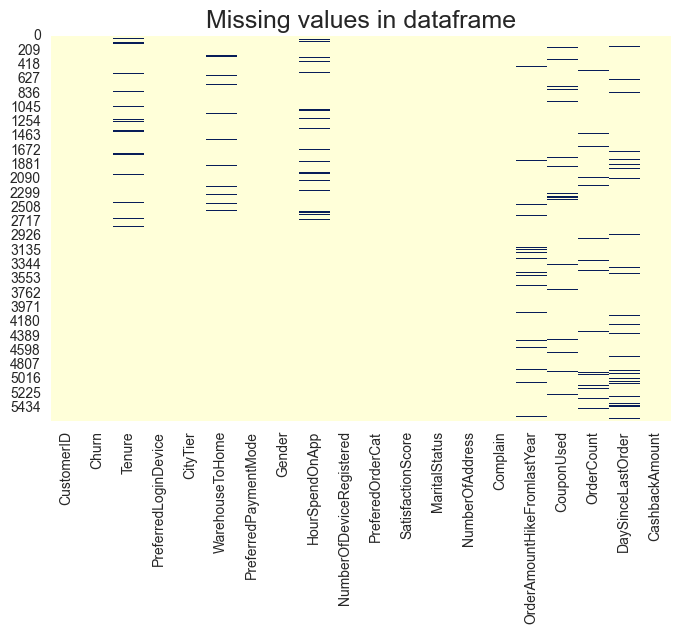

In [162]:
# check columns with missing values
plt.figure(figsize=(8,5))
sns.heatmap(data.isna(), cmap='YlGnBu', cbar=False)
plt.title('Missing values in dataframe', fontsize=18)
plt.show()

**Note**
- At glance, it seems that the missing values in column `Tenure`, `WarehouseToHome`, and `HourSpendOnApp` only appear in the beginning of the dataset but the missingness between columns doesn't look to correspond to each other. For example, if row ID 977 (see dataframe below) in column `WarehouseToHome` is missing, values in other columns are not.
- The other four variables, moreover, look random as each missing values appear in different rows. If a missing value in one variable is missing and that in another variable is also missing or have monotonous value (e.g., 0), we can tell that the missingness is systematic as they depend on another variables.
- Based on initial observations, the missingness mechanism in the dataset is suspected to be either MCAR or MAR. Further investigation is required to confirm this and to differentiate between the two.

In [163]:
# display three vars of interests
data.loc[:, ['Tenure', 'WarehouseToHome', 'HourSpendOnApp']].sample(n=10, random_state=42)

Tenure  WarehouseToHome  HourSpendOnApp
4331     1.0              7.0             4.0
1988    15.0              9.0             3.0
3443    13.0             29.0             3.0
4559     5.0              7.0             4.0
4898    13.0              7.0             4.0
4641     8.0              7.0             3.0
2117    29.0             15.0             NaN
3268    12.0              9.0             4.0
977      9.0              NaN             3.0
1115    12.0              6.0             3.0

In [164]:
# show cols with missing values
data[data.columns[data.isna().any()]].sample(10, random_state=42)

Tenure  WarehouseToHome  HourSpendOnApp  OrderAmountHikeFromlastYear  \
4331     1.0              7.0             4.0                         22.0   
1988    15.0              9.0             3.0                         13.0   
3443    13.0             29.0             3.0                         14.0   
4559     5.0              7.0             4.0                         13.0   
4898    13.0              7.0             4.0                         17.0   
4641     8.0              7.0             3.0                         14.0   
2117    29.0             15.0             NaN                         19.0   
3268    12.0              9.0             4.0                         13.0   
977      9.0              NaN             3.0                         21.0   
1115    12.0              6.0             3.0                         15.0   

      CouponUsed  OrderCount  DaySinceLastOrder  
4331         2.0         2.0                1.0  
1988         1.0         1.0                3.0  
3443         2.0         NaN                9.0  
4559         4.0         4.0                3.0  
4898        10.0         NaN                9.0  
4641         2.0         2.0                4.0  
2117         1.0         1.0                3.0  
3268         5.0         5.0               13.0  
977          0.0         1.0                2.0  
1115         3.0         5.0                8.0

**Note**: 
- When checking all columns containing missing values, there also seem to be no apparent or explicit patterns in the missing values between variables. What is meant by "explicit" is when a value in one variable is empty (`NaN`), a missing value in another variable will be empty too or have monotonous values. Or else, the patterns of missingness are not in the surface level so a deeper check should be done.
- Moreover, as can be seen only numerical features contain missing values. Categorical columns and target variables all contain complete cases.
- For testing whether the mechanism of missingness is MCAR or not, we use Little's MCAR test ([Little, 1988](https://www.tandfonline.com/doi/abs/10.1080/01621459.1988.10478722)). In Little's MCAR test, the $H_0$ is missing data is completely at random, and if the *p*-value is lower than the alpha at 0.05, we can reject the null hypothesis ($H_0$).

In [165]:
from pyampute.exploration.mcar_statistical_tests import MCARTest

# perform Little's MCAR test
mt = MCARTest(method='little')
lm_result = mt.little_mcar_test(data[data.columns[data.isna().any()]])

# perform hypothesis testing
if lm_result > 0.05:
    print(f'The p-value is {lm_result:.4f}')
    print('We cannot reject Missing Completely at Random (MCAR).')
    print('However, this does not confirm MCAR. Further exploration is needed.')
else:
    print(f'The p-value is {lm_result:.4f}')
    print('Missing data is likely not Missing Completely at Random (MCAR)')

The p-value is 0.0000
Missing data is likely not Missing Completely at Random (MCAR)


**Note**
- As the *p*-value is lower than the alpha at 0.05, then we reject the null hypothesis for MCAR (Missing Completely At Random). 
- The mechanism is more likely to be Missing At Random (MAR) in which missingness can be explained by variables observed in dataset. 
- And as we already identified the mechanism of missingness is MAR, we can consider Multiple Imputation with Chained Equation (MICE).
- Furthermore, to addresss the missingness with such characteristic, Multiple Imputation with Chained Equation (MICE) can be an option. 
    - This method is more considered than, for example, using univariate imputation (e.g., mean or median imputation) as the missing values not random. 
- In simple language, MICE predicts missing values by considering the relationship between the variable, where the missing values are in, and other variables. Afterwards, MICE will impute the predicted values iteratively to the missing values.

In [166]:
# copy dataset
df = data.copy()

# select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# apply MICE imputation to the numeric columns
imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# add the imputed values back into the original df
df[numeric_cols] = df_imputed_numeric

In [167]:
# check missing values
df.isna().sum().reset_index(name='count')

index  count
0                    CustomerID      0
1                         Churn      0
2                        Tenure      0
3          PreferredLoginDevice      0
4                      CityTier      0
5               WarehouseToHome      0
6          PreferredPaymentMode      0
7                        Gender      0
8                HourSpendOnApp      0
9      NumberOfDeviceRegistered      0
10             PreferedOrderCat      0
11            SatisfactionScore      0
12                MaritalStatus      0
13              NumberOfAddress      0
14                     Complain      0
15  OrderAmountHikeFromlastYear      0
16                   CouponUsed      0
17                   OrderCount      0
18            DaySinceLastOrder      0
19               CashbackAmount      0

**Note**
- MICE has been applied to the missing data imputation, and as can be seen, no variables contain missing values anymore. 
- However, one task left: We need to evaluate to what extent the data imputation affects the data. Below, we conduct a descriptive statistical test to evaluate if there is any substantial difference between before and after the imputation.

In [168]:
# evaluate quality of imputation technique
cols = data.columns[data.isna().any()]
original_summary = data[cols].describe()
imputed_summary = df[cols].describe()

# display result
print(f'Cols containing missing values: \n{cols}\n')
print("Original Data Summary:")
display(original_summary.round(3))
print("\nImputed Data Summary:")
display(imputed_summary.round(3))

Cols containing missing values: 
Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder'],
      dtype='object')

Original Data Summary:


Tenure  WarehouseToHome  HourSpendOnApp  OrderAmountHikeFromlastYear  \
count  5366.000         5379.000        5375.000                     5365.000   
mean     10.190           15.640           2.932                       15.708   
std       8.557            8.531           0.722                        3.675   
min       0.000            5.000           0.000                       11.000   
25%       2.000            9.000           2.000                       13.000   
50%       9.000           14.000           3.000                       15.000   
75%      16.000           20.000           3.000                       18.000   
max      61.000          127.000           5.000                       26.000   

       CouponUsed  OrderCount  DaySinceLastOrder  
count    5374.000    5372.000           5323.000  
mean        1.751       3.008              4.543  
std         1.895       2.940              3.654  
min         0.000       1.000              0.000  
25%         1.000       1.000              2.000  
50%         1.000       2.000              3.000  
75%         2.000       3.000              7.000  
max        16.000      16.000             46.000


Imputed Data Summary:


Tenure  WarehouseToHome  HourSpendOnApp  OrderAmountHikeFromlastYear  \
count  5630.000         5630.000        5630.000                     5630.000   
mean      9.932           15.622           2.912                       15.714   
std       8.471            8.340           0.712                        3.589   
min      -3.041            5.000           0.000                       11.000   
25%       2.000            9.000           2.000                       13.000   
50%       8.000           14.000           3.000                       15.000   
75%      15.000           20.000           3.000                       18.000   
max      61.000          127.000           5.000                       26.000   

       CouponUsed  OrderCount  DaySinceLastOrder  
count    5630.000    5630.000           5630.000  
mean        1.792       3.076              4.624  
std         1.915       2.953              3.608  
min         0.000       0.837              0.000  
25%         1.000       1.000              2.000  
50%         1.000       2.000              3.640  
75%         2.000       3.000              7.000  
max        16.000      17.231             46.000

**Note**: 
- The two dataframes display the outputs of before and after data imputation using descriptive statistics.
- In general, after the applying MICE to the dataset, the characteristics of each variable do not change much. This is expected as the data imputation must not substantially change the distribution of the data. 
- The most apparent changes are in the means of `Tenure` and min values of `OrderCount` which are slightly decrease for both variables.
- Additionally, as the missing values have been addressed, the clean version of dataframes, i.e., `df` will be used onwards.

In [169]:
# export dataframe for external uses
df.to_csv('../data/clean_data.csv', index=False)
df[['OrderCount', 'CouponUsed']].describe().round(2).transpose()

count  mean   std   min  25%  50%  75%    max
OrderCount  5630.0  3.08  2.95  0.84  1.0  2.0  3.0  17.23
CouponUsed  5630.0  1.79  1.92  0.00  1.0  1.0  2.0  16.00

In [170]:
# for validation only
test = pd.read_csv('../data/clean_data.csv')
test[['OrderCount', 'CouponUsed']].describe().round(2).transpose()

count  mean   std   min  25%  50%  75%    max
OrderCount  5630.0  3.08  2.95  0.84  1.0  2.0  3.0  17.23
CouponUsed  5630.0  1.79  1.92  0.00  1.0  1.0  2.0  16.00

### **2.3 <span style='color:red'>Check Outliers</span>**

During checking data distribution using histograms, it was shown that some outliers are present in some variables. This section is a follow-up on this issue. The outlier identification is done by exploiting interquartile range (IQR). This statistical test is considered as it is less sensitive to extreme values. This statistical test is more robust as it uses quartiles (Q3-Q1), instead of mean and standard deviation in z-score test for outlier detection. This statistical test also does not assume a normal distribution for the data, making it more flexible.

In [171]:
# create function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df.loc[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"The number of outliers in '{column}' is {len(outliers)} or {(len(outliers)/len(df)*100):.2f}% of the total data ({len(df)} rows).")

In [172]:
# specify cols for outlier check
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome',
                     'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',               
                     'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                     'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# perform outlier check
for col in df[numerical_columns]:
    detect_outliers(df, col)

The number of outliers in 'Tenure' is 4 or 0.07% of the total data (5630 rows).
The number of outliers in 'CityTier' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'WarehouseToHome' is 2 or 0.04% of the total data (5630 rows).
The number of outliers in 'HourSpendOnApp' is 6 or 0.11% of the total data (5630 rows).
The number of outliers in 'NumberOfDeviceRegistered' is 397 or 7.05% of the total data (5630 rows).
The number of outliers in 'SatisfactionScore' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'NumberOfAddress' is 4 or 0.07% of the total data (5630 rows).
The number of outliers in 'Complain' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'OrderAmountHikeFromlastYear' is 33 or 0.59% of the total data (5630 rows).
The number of outliers in 'CouponUsed' is 697 or 12.38% of the total data (5630 rows).
The number of outliers in 'OrderCount' is 758 or 13.46% of the total data (5630 rows).
The number of outliers 

**Note**
- There are 10 variables containing missing values, namely `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`, and `CashbackAmount`.
- Those variables have varying rates of outliers, ranging between 0.07% and 13.48%. 
- Variables such as `NumberOfDeviceRegistered` (7.05%), `CouponUsed` (11.17%), `OrderCount` (13.48%), and `CashbackAmount` (7.78%) have considerable numbers of outliers.
- Capping or winsorize outliers can be a viable option as this method can reduce the impact of outliers on the dataset without losing the data considering the dataset only contains 5630 rows. Outlier removal in this situation is not an ideal option as it will decrease the size of data which potentially influences the statistical power or model's performance. 
- Here, we set the cut-offs to be 10% of the min the max values. This means data points beyond these cut-offs will be replaced by the 10th percentile and 90th percentile of the data.

In [173]:
from scipy.stats.mstats import winsorize

# specify cols to winsorize
col_to_winsorize = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                    'NumberOfDeviceRegistered', 'NumberOfAddress', 
                    'OrderAmountHikeFromlastYear', 'CouponUsed', 
                    'OrderCount', 'DaySinceLastOrder', 
                    'CashbackAmount']  

# create function to winsorize extreme values
def winsorize_columns(df, columns, limits=(0.1, 0.1)):
    for col in columns:
        df[col] = winsorize(df[col], limits=limits)
    return df

# perform winsorization
winsorided_data = winsorize_columns(df.copy(), col_to_winsorize)

# evaluate winsorization result
for col in df[col_to_winsorize]:
    detect_outliers(winsorided_data, col)

The number of outliers in 'Tenure' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'WarehouseToHome' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'HourSpendOnApp' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'NumberOfDeviceRegistered' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'NumberOfAddress' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'OrderAmountHikeFromlastYear' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'CouponUsed' is 697 or 12.38% of the total data (5630 rows).
The number of outliers in 'OrderCount' is 758 or 13.46% of the total data (5630 rows).
The number of outliers in 'DaySinceLastOrder' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'CashbackAmount' is 0 or 0.00% of the total data (5630 rows).


**Note**: 
- A winsorization technique has been carried out on the dataset. While this technique can handle outliers in the majority of variables, `CouponUsed` and `OrderCount` remain having outliers as the outliers in these variables fall below the upper threshold.
- One possibility that those two variables still contain the same number of outliers is that their outliers are outside the defined thresholds, and to confirm this possibility, we will investigate them further.

In [174]:
# check distribution of data
print('Original data:')
display(df[['OrderCount','CouponUsed']].describe().round(2).transpose())
print('Winsorized data:')
display(winsorided_data[['OrderCount','CouponUsed']].describe().round(2).transpose())

Original data:


count  mean   std   min  25%  50%  75%    max
OrderCount  5630.0  3.08  2.95  0.84  1.0  2.0  3.0  17.23
CouponUsed  5630.0  1.79  1.92  0.00  1.0  1.0  2.0  16.00

Winsorized data:


count  mean   std  min  25%  50%  75%  max
OrderCount  5630.0  2.74  2.03  1.0  1.0  2.0  3.0  7.0
CouponUsed  5630.0  1.55  1.22  0.0  1.0  1.0  2.0  4.0

In [222]:
def extract_sum_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_upper = df.loc[df[column] > upper_bound]
    outlier_lower = df.loc[df[column] < lower_bound]
    print(f'Total outliers above upper bound for {column}: {len(outlier_upper)}')
    print(f'Total outliers below lower bound for {column}: {len(outlier_lower)}')

print('Before winsorization:')
extract_sum_outliers(df, 'CouponUsed')
extract_sum_outliers(df, 'OrderCount')

Before winsorization:
Total outliers above upper bound for CouponUsed: 697
Total outliers below lower bound for CouponUsed: 0
Total outliers above upper bound for OrderCount: 758
Total outliers below lower bound for OrderCount: 0


In [223]:
def extract_sum_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_upper = df.loc[df[column] > upper_bound]
    outlier_lower = df.loc[df[column] < lower_bound]
    print(f'Total outliers above upper bound for {column}: {len(outlier_upper)}')
    print(f'Total outliers below lower bound for {column}: {len(outlier_lower)}')

print('After winsorization:')
extract_sum_outliers(winsorided_data, 'CouponUsed')
extract_sum_outliers(winsorided_data, 'OrderCount')

After winsorization:
Total outliers above upper bound for CouponUsed: 697
Total outliers below lower bound for CouponUsed: 0
Total outliers above upper bound for OrderCount: 758
Total outliers below lower bound for OrderCount: 0


**Note**
- After winsorization on `OrderCount` and `CouponUsed`, both lower bound values are exactly the same as the 10th percentile, so are the upper bound values at the 90th percentile. This means the winsorization already affects the extreme values as the max values have been replaced by values at the 90th percentiles. 
- Another point to add is that

In [176]:
# for validation INI TES BUAT COCOKING KE FARIZ
test = pd.read_csv('../data/clean_data.csv')
test[['OrderCount', 'CouponUsed']].describe(percentiles=[0.1, 0.9]).round(2).transpose()

count  mean   std   min  10%  50%  90%    max
OrderCount  5630.0  3.08  2.95  0.84  1.0  2.0  7.0  17.23
CouponUsed  5630.0  1.79  1.92  0.00  0.0  1.0  4.0  16.00

In [177]:
# check distribution of data
print('Original data:')
display(df[['OrderCount','CouponUsed']].describe(percentiles=[0.1, 0.9]).round(2).transpose())
print('Winsorized data:')
display(winsorided_data[['OrderCount','CouponUsed']].describe(percentiles=[0.1, 0.9]).round(2).transpose())

Original data:


count  mean   std   min  10%  50%  90%    max
OrderCount  5630.0  3.08  2.95  0.84  1.0  2.0  7.0  17.23
CouponUsed  5630.0  1.79  1.92  0.00  0.0  1.0  4.0  16.00

Winsorized data:


count  mean   std  min  10%  50%  90%  max
OrderCount  5630.0  2.74  2.03  1.0  1.0  2.0  7.0  7.0
CouponUsed  5630.0  1.55  1.22  0.0  0.0  1.0  4.0  4.0

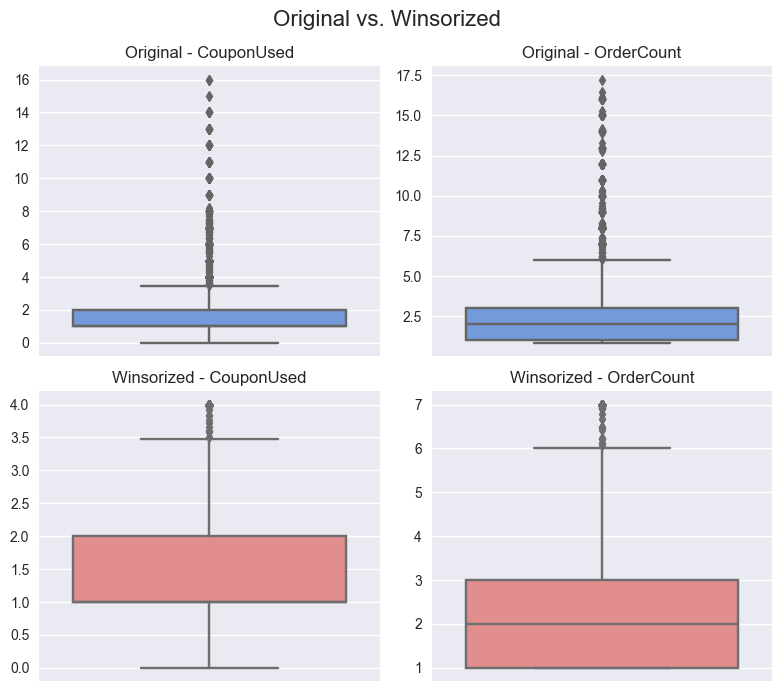

In [178]:
# setup plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))
fig.suptitle('Original vs. Winsorized', fontsize=16)

# original data
for i, col in enumerate(['CouponUsed', 'OrderCount']):
    sns.boxplot(y=df[col], color='cornflowerblue', ax=axes[0, i])
    axes[0, i].set_title(f'Original - {col}', fontsize=12)
    axes[0, i].set_ylabel(None)

# winsorized data
for i, col in enumerate(['CouponUsed', 'OrderCount']):
    sns.boxplot(y=winsorided_data[col], color='lightcoral', ax=axes[1, i])
    axes[1, i].set_title(f'Winsorized - {col}', fontsize=12)
    axes[1, i].set_ylabel(None)

# adjust layout and spacing
plt.tight_layout()
plt.show()

In [179]:
# bisa beda soalnya
order_upper = len(winsorided_data[winsorided_data['OrderCount'] == 7.0].loc[:, ['OrderCount']])
order_lower = len(winsorided_data[winsorided_data['OrderCount'] == 1.0].loc[:, ['OrderCount']])
coupon_upper = len(winsorided_data[winsorided_data['CouponUsed'] == 4.0].loc[:, ['CouponUsed']])
coupon_lower = len(winsorided_data[winsorided_data['CouponUsed'] == 0.0].loc[:, ['CouponUsed']])
print(f'OrderCount: Total values at 90th percentile is {order_upper}')
print(f'OrderCount: Total values at 10th percentile is {order_lower}')
print(f'CouponUsed: Total values at 90th percentile is {coupon_upper}')
print(f'CouponUsed: Total values at 10th percentile is {coupon_lower}')

OrderCount: Total values at 90th percentile is 741
OrderCount: Total values at 10th percentile is 1755
CouponUsed: Total values at 90th percentile is 685
CouponUsed: Total values at 10th percentile is 1030


In [180]:
# describe CouponUsed and OrderCount
print('Original data:')
before_winsor = df[['CouponUsed', 'OrderCount']].describe().round(2).transpose()
display(before_winsor)
print('Winsorized data:')
after_winsor  = winsorided_data[['CouponUsed', 'OrderCount']].describe().round(2).transpose()
display(after_winsor)

Original data:


count  mean   std   min  25%  50%  75%    max
CouponUsed  5630.0  1.79  1.92  0.00  1.0  1.0  2.0  16.00
OrderCount  5630.0  3.08  2.95  0.84  1.0  2.0  3.0  17.23

Winsorized data:


count  mean   std  min  25%  50%  75%  max
CouponUsed  5630.0  1.55  1.22  0.0  1.0  1.0  2.0  4.0
OrderCount  5630.0  2.74  2.03  1.0  1.0  2.0  3.0  7.0

**Note**: While winsorization technique successfully address the extreme values in most variables, it doesn't address the outliers in column `CouponUsed` and `OrderCount`. They still have significant rates of outliers so a further treatment for these variables is necessary.

### **Check Inconsistent Formatting**

In [181]:
# check cardinality
(df.select_dtypes(include=['object'])
 .nunique()
 .reset_index()
 .rename(columns={0:'count'}))

index  count
0  PreferredLoginDevice      3
1  PreferredPaymentMode      7
2                Gender      2
3      PreferedOrderCat      6
4         MaritalStatus      3

In [182]:
# check cols with high nunique
print(df['PreferedOrderCat'].unique())
print(df['PreferredPaymentMode'].unique())

['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']


**Note**
- Prior to checking inconsistent formatting, we conducted cardinality check because variables with higher unique values are more likely to contain inconsistent labels, e.g., Male and Man in gender category.
- As shown above, for column `PreferredOrderCat`, there are 6 categories and `PreferredPaymentMode` have 7. 
    - `PreferredOrderCat`: Label `Mobile` and `Mobile Phone` seem ambiguous but we can assume that `Mobile` is a non-smartphone so we can still keep the labels as they are.
    - `PreferredPaymentMode`: Two pairs of ambiguities are found: `COD` vs `Cash on Delivery` and `CC` vs `Credit Card`. For maintaining consistency and clarity, the ambiguities will be resolved by changing `COD` to `Cash on Delivery` and `CC` to `Credit Card`.

In [183]:
# replace values
df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'}, inplace=True)

In [184]:
# double check PreferredPaymentMode
print(df['PreferredPaymentMode'].unique())

['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']


In [224]:
# export dataframe for external uses
df.to_csv('../data/clean_data_with_updated_values.csv', index=False)

<div class="alert alert-block alert-warning">
<b>Summary</b><br>

In short, in this section, we already performed a series of data cleaning techniques, especially for missing values and outliers. The data cleaning here is primarily aimed for preparing data for an analysis on churns. Nonetheless, it is noteworthy that as the general purposes of data analysis and modeling are different, only basic data preprocessing was done. No pipelines or feature engineering techniques for numerical rescaling, imbalance treatment on the target feature, or encoding were adopted.

</div>

## **3 Exploratory Data Analysis**

As discussed earlier in the Section 1, the ultimate goal is to address customer churn, and to this end, we firstly need to identify the characteristics of customers who churned. This identification will shed light on the possible contributing factors of the churn, and enable the Customer Success Manager as the key stakeholder of this project to take necessary action to mitigate the business impacts of the customer churn. This section explores the dataset by relating every features (both categorical and numerical) to the target variable, i.e., `Churn`. By associating the features to `Churn`, it is expected to gain an understanding of the customers' characteristics who no longer make any purchases in the e-commerce platform.

To make this section more structured, we mainly divide section 3 into two groups based on the broad data types: categorical and numerical features. The division will be further detailed by using questions to guide the analysis. However, before moving on to the first subsection, we will check out the overall churn rate in the e-commerce company as this will be the starting point for our analysis and data modeling.
- **Categorical features**
    - Q1: Which login device do churners generally prefer?
    - Q2: Are there any preferred payment mode the churners have?
    - Q3: What gender category are the churners?
    - Q4: Are those churners mostly single?
    - Q5: Do churners have any preference in terms of order category?
- **Numerical features**
    - Q1: Are there any features highly correlated with churns?
    - Q2: To what extent churning customers and loyal customers are different in terms of their purchasing behaviors?

In [186]:
# get churn rate
target_col = pd.DataFrame({'count':df['Churn'].value_counts(),
                           'proportion':round(df['Churn'].value_counts(normalize=True) *100, 2)})
display(target_col)

count  proportion
0.0   4682       83.16
1.0    948       16.84

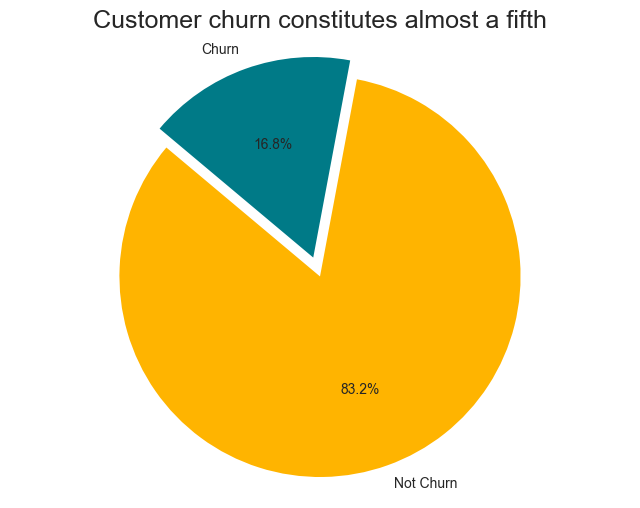

In [187]:
# display pie chart
labels = ['Not Churn', 'Churn']
sizes = target_col['count']
color = ["#FFB400", "#007A87"]
explode = (0, 0.1) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=color, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')  
plt.title('Customer churn constitutes almost a fifth', loc='center', fontsize=18)
plt.show()

**Note**
- In general, the number of customers who no longer make purchase is almost a fifth (16.84%) of the total customers in the e-commerce company. 
- For a comparison, the average customer churn rate in online retails or e-commerce in the US is 22% ([Statista, 2022](https://www.statista.com/statistics/816735/customer-churn-rate-by-industry-us/)). Despite lower than that in the US, this number is alarming as it is closer to the average. To mitigate the negative impacts of the customer churn, the company should take an action to lower the churn rate. Losing 16.8% of customers can significantly affect the revenue of the company if the company does not address the underlying issue. 
- One reasonable guess is whether the churn there is something to do with customer satisfaction (`SatisfactionScore`).
- As a consequence, a further exploration on this variable is crucial. 

### **3.1 Categorical Features**

In [188]:
# get counts of each cat feature by churn status
aggregation_dict = {'PreferredLoginDevice': 'count',
                   'PreferredPaymentMode': 'count',
                   'Gender': 'count',  
                   'PreferedOrderCat': 'count',
                   'MaritalStatus': 'count'}  

df.groupby('Churn').agg(func=aggregation_dict).reset_index()

Churn  PreferredLoginDevice  PreferredPaymentMode  Gender  \
0    0.0                  4682                  4682    4682   
1    1.0                   948                   948     948   

   PreferedOrderCat  MaritalStatus  
0              4682           4682  
1               948            948

**Note**: 
- In general, irrespective of features, churners (customers who churn, `Churn` == `1`) are smaller in counts, compared to those who stays. 
- This finding stresses the higher frequency of loyal customers that have been discussed earlier. 
- And after this, we will check each categorical feature in greater details using data visualization techniques.

#### **Q1. Which login device do churners generally prefer?**

In [189]:
churn_device_df = (df.groupby(['Churn', 'PreferredLoginDevice'])
                   .agg(func={'PreferredLoginDevice':'count'})
                   .rename(columns={'PreferredLoginDevice':'Count'})
                   .reset_index()
                   .sort_values(by='Count', ascending=False))

churn_device_df

Churn PreferredLoginDevice  Count
1    0.0         Mobile Phone   2417
0    0.0             Computer   1310
2    0.0                Phone    955
4    1.0         Mobile Phone    348
3    1.0             Computer    324
5    1.0                Phone    276

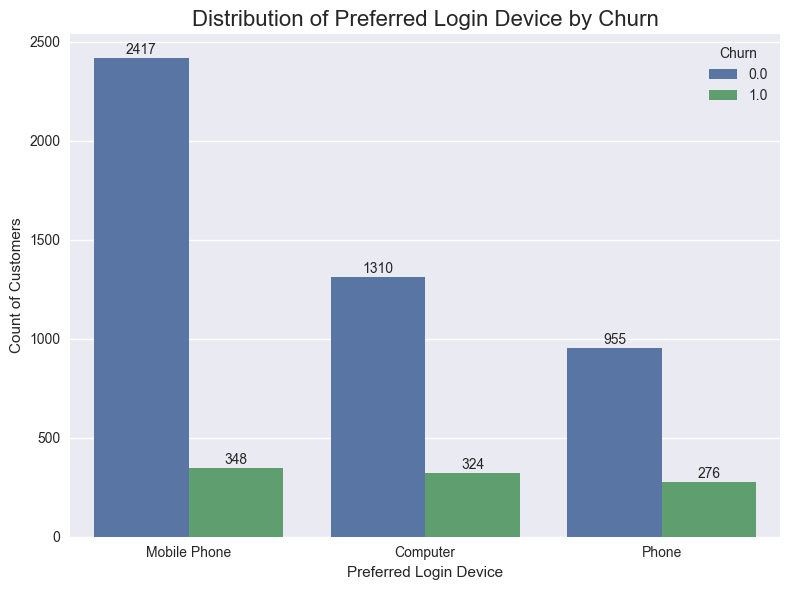

In [190]:
plt.figure(figsize=(8, 6))
plot1 = sns.barplot(x='PreferredLoginDevice', y='Count', hue='Churn', data=churn_device_df)

# add labels
for bar in plot1.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot1.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Preferred Login Device')
plt.ylabel('Count of Customers')
plt.title('Distribution of Preferred Login Device by Churn', fontsize=16)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

In [191]:
# calculate total customers per login device (churned + non-churned)
total_customers = churn_device_df.groupby('PreferredLoginDevice')['Count'].sum()

# calculate churned customers per login
churned_customers = churn_device_df[churn_device_df['Churn'] == 1.0].set_index('PreferredLoginDevice')['Count']

# calculate rate
churn_rate = (churned_customers / total_customers * 100).reset_index(name='rate').round(2)

display(churn_rate.sort_values(by='rate', ascending=False))

PreferredLoginDevice   rate
2                Phone  22.42
0             Computer  19.83
1         Mobile Phone  12.59

**Note**
- The majority of customers prefer using mobile phones and computers to browse products on the e-commerce platform as shown by the general counts.
- In terms of churn couts, different devices do not seem to have substantial differences as their differences range between 24 (`Mobile Phone` - `Computer`) and 72 (`Mobile Phone` - `Phone`).
- On the other hand, the simple counts only may not give us a detailed insight to suspect if login device can contribute to the churns.
- Here, we computed the churn rate by each device type, and found that despite its small counts in the `Phone` category, customers who use this category of devices are more likely to churn.
- We can also see from the output above that customers using `Mobile Phone` are less likely to churn.
- The higher rate in `Phone` (we assume non-smart phones) and the lower rate in `Mobile Phone` provide us evidence that login devices are likely to contribute to the churn.

#### **Q2. Are there any preferred payment mode the churners have?**

In [192]:
payment_df = (df.groupby(['Churn', 'PreferredPaymentMode'])
              .agg(func={'PreferredPaymentMode':'count'})
              .rename(columns={'PreferredPaymentMode':'Count'})
              .reset_index()
              .sort_values(by='Count', ascending=False))

payment_df

Churn PreferredPaymentMode  Count
2    0.0           Debit Card   1958
1    0.0          Credit Card   1522
3    0.0             E wallet    474
0    0.0     Cash on Delivery    386
7    1.0           Debit Card    356
4    0.0                  UPI    342
6    1.0          Credit Card    252
8    1.0             E wallet    140
5    1.0     Cash on Delivery    128
9    1.0                  UPI     72

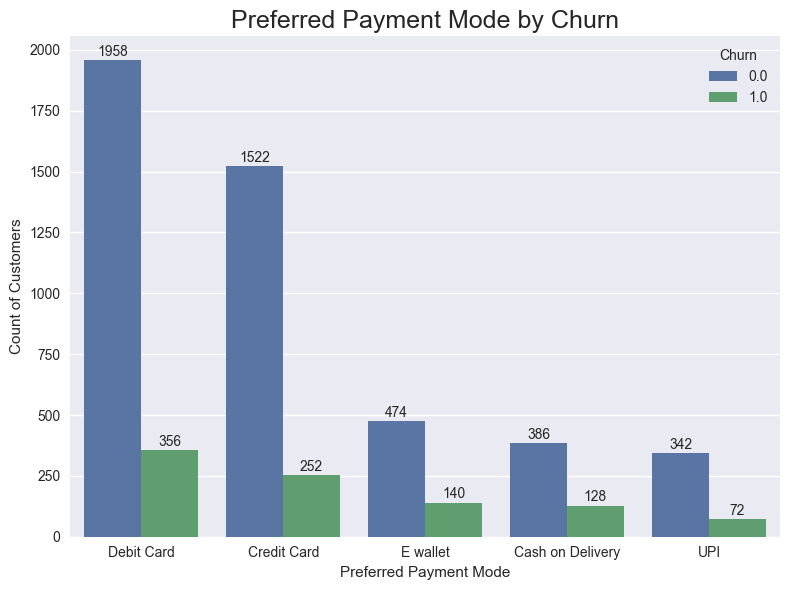

In [193]:
plt.figure(figsize=(8, 6))
plot2 = sns.barplot(x='PreferredPaymentMode', y='Count', hue='Churn', data=payment_df)

# add labels
for bar in plot2.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot2.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Preferred Payment Mode')
plt.ylabel('Count of Customers')
plt.title('Preferred Payment Mode by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

In [194]:
# Calculate total customers per payment mode (churned + non-churned)
total_customers = payment_df.groupby('PreferredPaymentMode')['Count'].sum()

# Calculate churned customers per payment mode
churned_customers = payment_df[payment_df['Churn'] == 1.0].set_index('PreferredPaymentMode')['Count']

# Calculate churn rate per payment mode
churn_rate = (churned_customers / total_customers * 100).reset_index(name='rate').round(2)

# Display the churn rate
display(churn_rate.sort_values(by='rate', ascending=False))

PreferredPaymentMode   rate
0     Cash on Delivery  24.90
3             E wallet  22.80
4                  UPI  17.39
2           Debit Card  15.38
1          Credit Card  14.21

**Note**: 
- Irrespective of the churn status, debit card remains the most preferred payment method in the e-commerce, and UPI ([Unified Payment Interface](https://en.wikipedia.org/wiki/Unified_Payments_Interface)) is the least preferred one with count of 414.
- Similar to the Q1, we also need to take the churn rate of each payment mode to get a more comprehensive understanding of the churn.
- As shown, while UPI has the lowest count, Cash on Delivery (COD) and e-wallet has a high association with the churn since the churn rate in these payment modes constitute greater than 20%.
- Putting the findings in business context, the varying payment modes might influence customer churn, with COD users showing the highest and churn rate and card-based payment users indicate lowest rates.
- To further understand why COD has the highest churn rate, we drill down customers who used COD in their payments.

Churn rate for cod customers: 24.90%
Overall churn rate: 16.84%


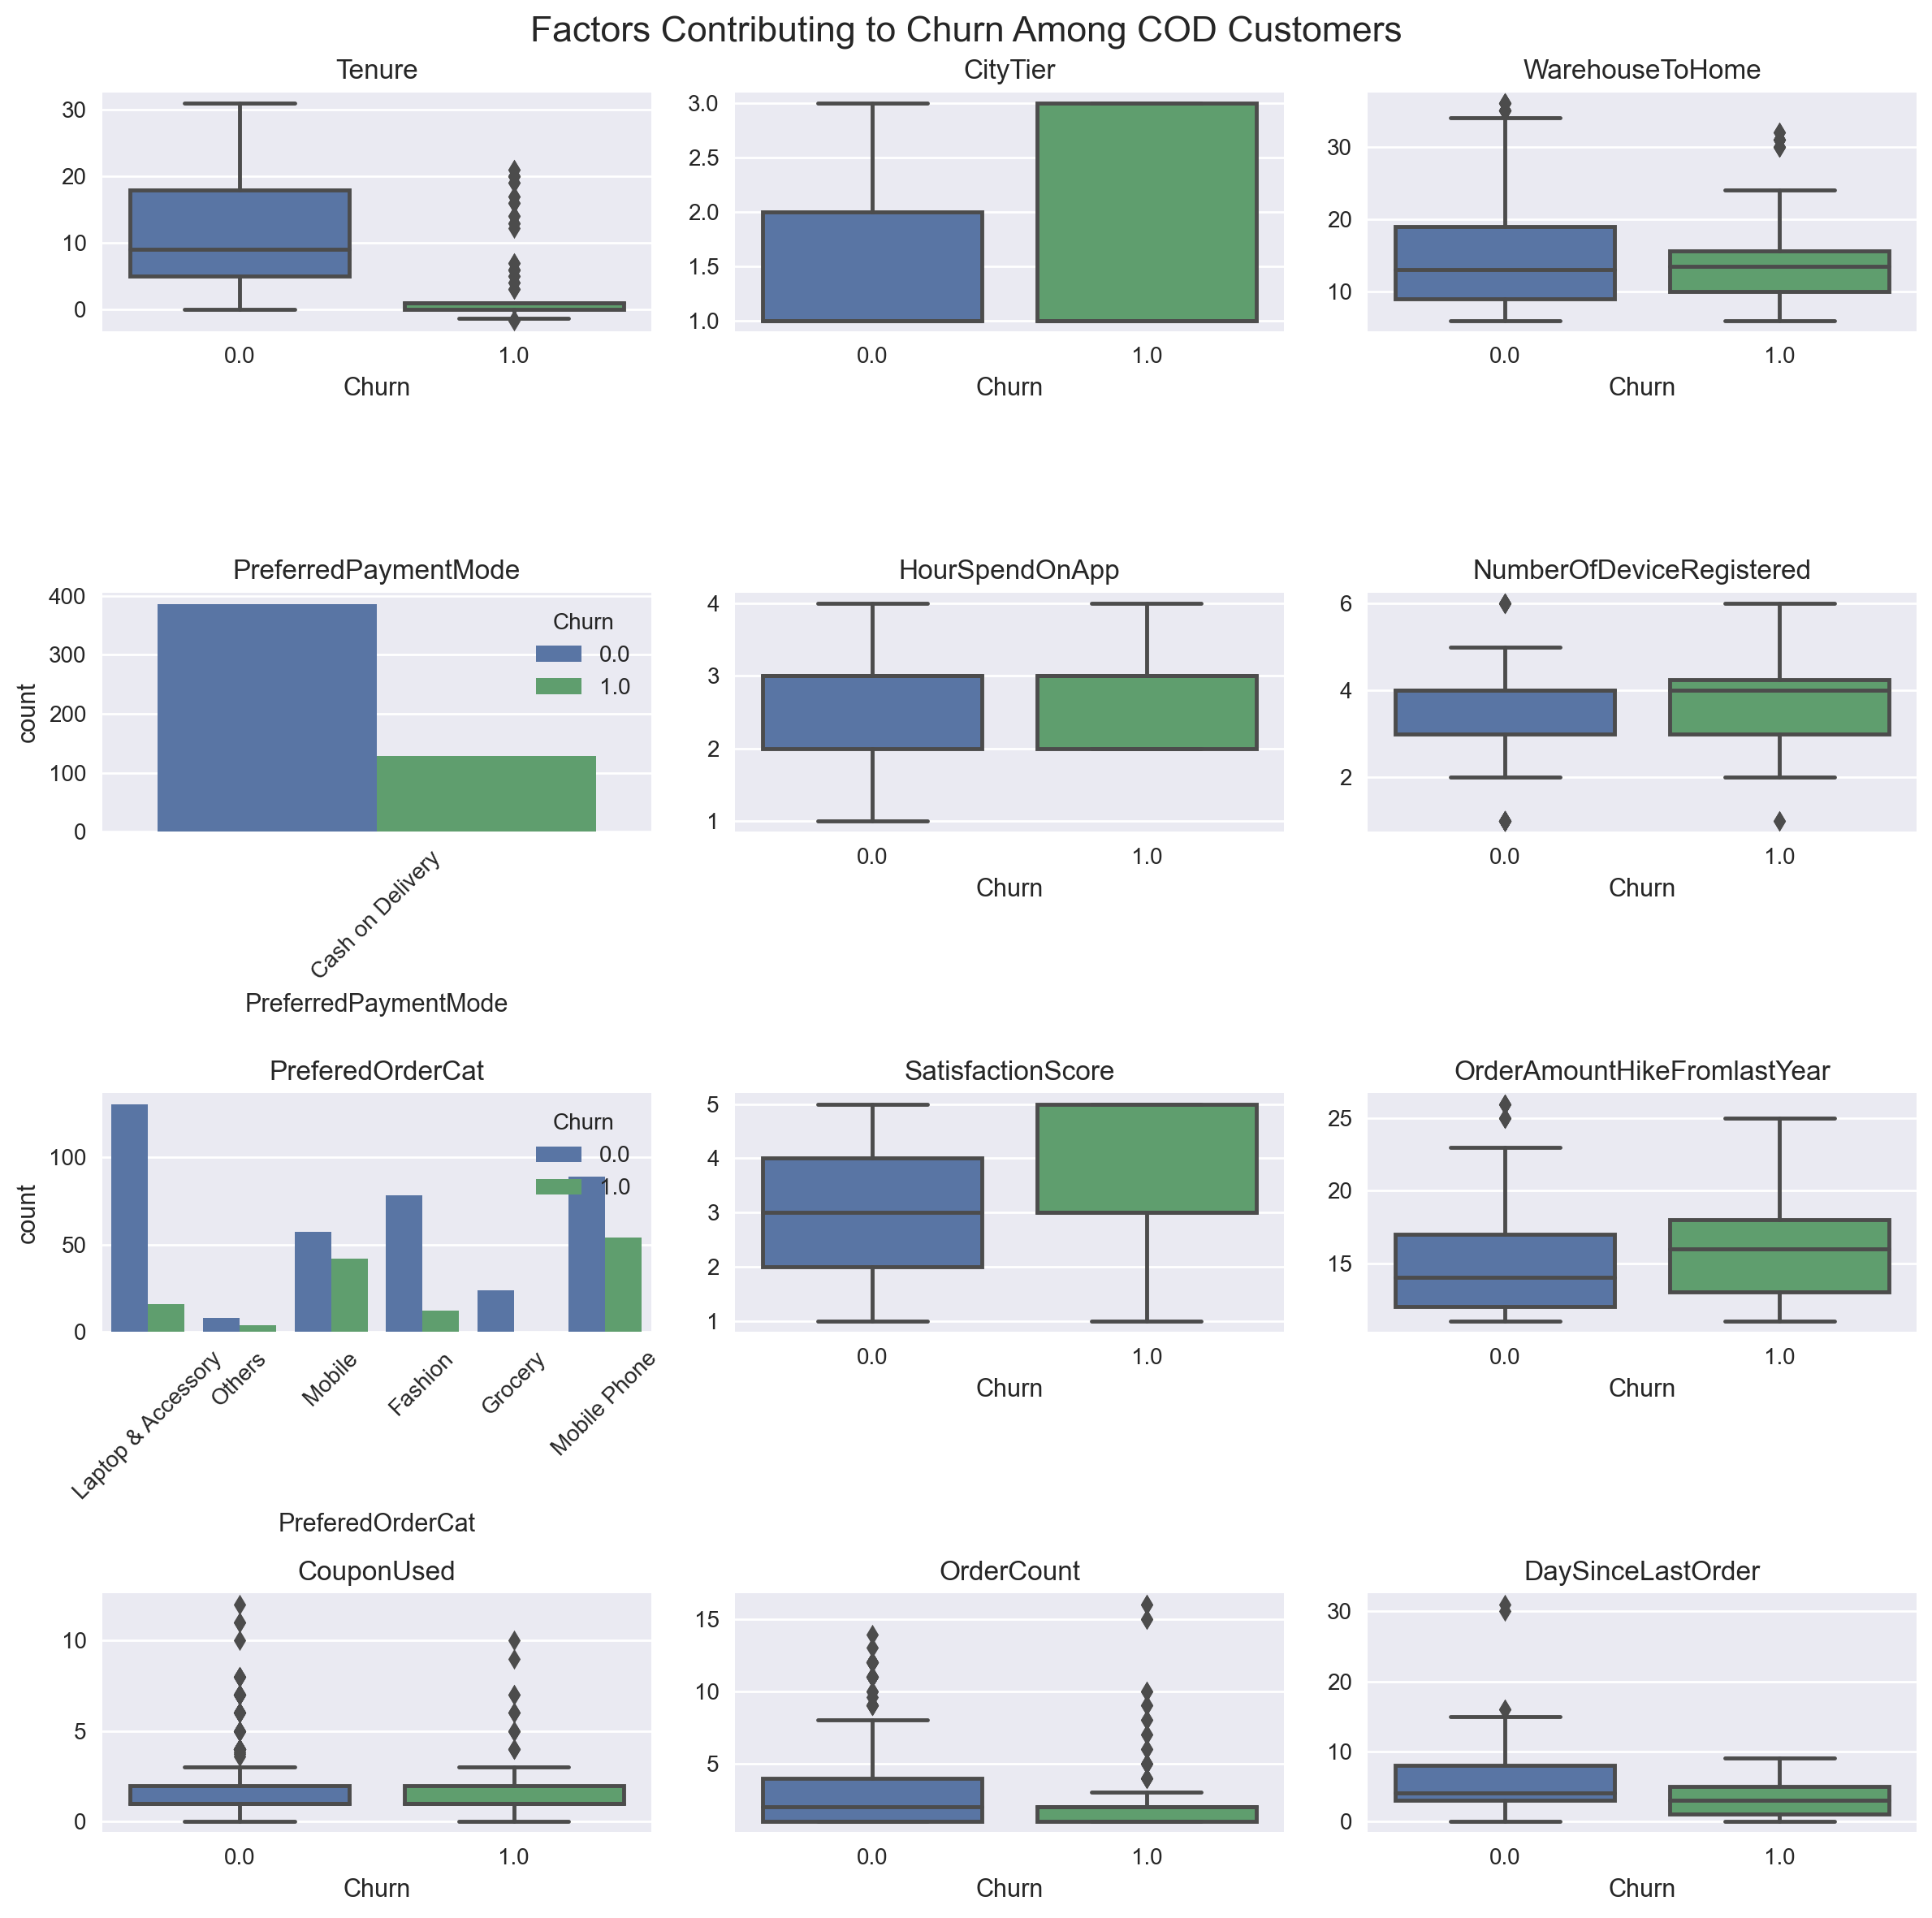

In [195]:
# Filter for cod customers
cod_customers = df[df['PreferredPaymentMode'] == 'Cash on Delivery']

# Compare churn rates
churn_rate_cod = cod_customers['Churn'].mean()
churn_rate_overall = df['Churn'].mean()

print(f"Churn rate for cod customers: {churn_rate_cod:.2%}")
print(f"Overall churn rate: {churn_rate_overall:.2%}")

# Analyze factors for single customers
factors = ['Tenure', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 
           'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 
           'SatisfactionScore', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
           'OrderCount', 'DaySinceLastOrder']

fig, axes = plt.subplots(4, 3, figsize=(12, 12), dpi=200)
fig.suptitle('Factors Contributing to Churn Among COD Customers', fontsize=16)

for i, factor in enumerate(factors):
    ax = axes[i // 3, i % 3]
    if df[factor].dtype in ['int64', 'float64']:
        sns.boxplot(x='Churn', y=factor, data=cod_customers, ax=ax)
        ax.set_ylabel(None)
    else:
        sns.countplot(x=factor, hue='Churn', data=cod_customers, ax=ax)
        ax.tick_params(axis='x', rotation=45)
    ax.set_title(factor)
    

plt.tight_layout()
plt.show()

**Note**
- A further exploration on the behaviors of customers who use cash on delivery as their payment method reveals that those whose tenure is shorter, have higher city tier and fewer order count, and make more recent order, are more susceptible to churn.
- In other words, the characteristics of COD customers who churned are: relatively new to the platform, live in urban areas, have limited purchase history, and have recently placed an order.

#### **Q3. What gender category are the churners?**

In [198]:
gender_df = (df.groupby(['Churn', 'Gender'])
             .agg(func={'Gender':'count'})
             .rename(columns={'Gender':'Count'})
             .reset_index()
             .sort_values(by='Count', ascending=False))
gender_df

Churn  Gender  Count
1    0.0    Male   2784
0    0.0  Female   1898
3    1.0    Male    600
2    1.0  Female    348

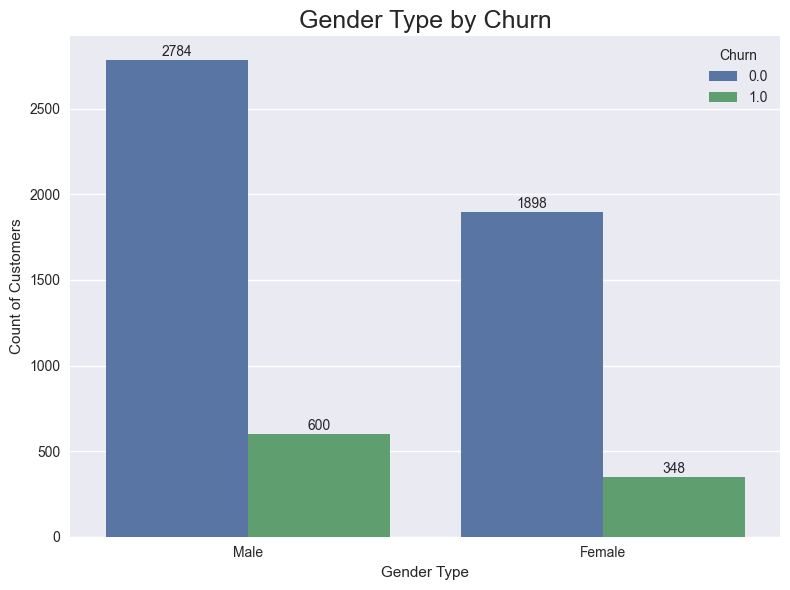

In [199]:
plt.figure(figsize=(8, 6))
plot3 = sns.barplot(x='Gender', y='Count', hue='Churn', data=gender_df)

# add labels
for bar in plot3.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot3.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Gender Type')
plt.ylabel('Count of Customers')
plt.title('Gender Type by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

In [201]:
# compute churn rate by gender
total_customers = gender_df.groupby('Gender')['Count'].sum()
churned_customers = gender_df[gender_df['Churn'] == 1.0].set_index('Gender')['Count']
churn_rate = (churned_customers / total_customers * 100).reset_index(name='rate').round(2)
display(churn_rate.sort_values(by='rate', ascending=False))

Gender   rate
1    Male  17.73
0  Female  15.49

**Note**
- The e-commerce customers in general are predominated by men (*N* = 3384) with the churn rate of 17.73%. The number of female customers consitutes only 2246 and churn rate of 15.49%.
- With this finding, we can say that male customers are more likely to churn than females although the rate difference is small.
- Due to this small difference, it is unlikely that the churn is a gender-related issue.

#### **Q4. Are those churners mostly single?**

In [202]:
marital_df = (df.groupby(['Churn', 'MaritalStatus'])
             .agg(func={'MaritalStatus':'count'})
             .rename(columns={'MaritalStatus':'Count'})
             .reset_index()
             .sort_values(by='Count', ascending=False))
marital_df

Churn MaritalStatus  Count
1    0.0       Married   2642
2    0.0        Single   1316
0    0.0      Divorced    724
5    1.0        Single    480
4    1.0       Married    344
3    1.0      Divorced    124

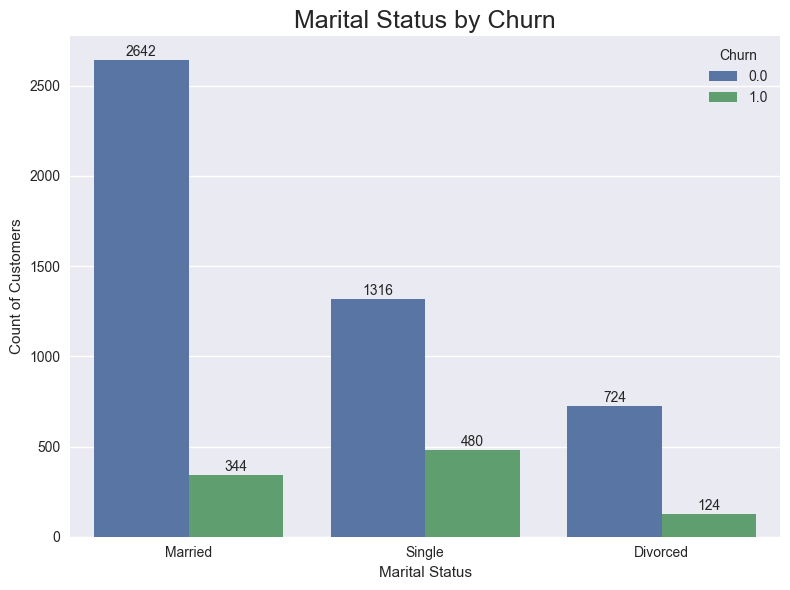

In [203]:
plt.figure(figsize=(8, 6))
plot4 = sns.barplot(x='MaritalStatus', y='Count', hue='Churn', data=marital_df)

# add labels
for bar in plot4.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot4.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Marital Status')
plt.ylabel('Count of Customers')
plt.title('Marital Status by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

In [204]:
#  Calculate the total count by MaritalStatus
total_counts = marital_df.groupby('MaritalStatus')['Count'].sum().reset_index()
total_counts.columns = ['MaritalStatus', 'TotalCount']

# Calculate the churn count by MaritalStatus
churn_counts = marital_df[marital_df['Churn'] == 1.0].groupby('MaritalStatus')['Count'].sum().reset_index()
churn_counts.columns = ['MaritalStatus', 'ChurnCount']

# Merge the total counts and churn counts
merged_df = pd.merge(total_counts, churn_counts, on='MaritalStatus', how='left')

# Fill NaN values with 0 for MaritalStatus that have no churn
merged_df['ChurnCount'] = merged_df['ChurnCount'].fillna(0)

# Calculate the churn rate
merged_df['ChurnRate'] = (merged_df['ChurnCount'] / merged_df['TotalCount']*100).round(2)

display(merged_df)


MaritalStatus  TotalCount  ChurnCount  ChurnRate
0      Divorced         848         124      14.62
1       Married        2986         344      11.52
2        Single        1796         480      26.73

**Note**
- Even though the majority of customer marital statuses are married, single customers have the highest contribution to the churn. Out of 1316, there are 480 customers who churned (churn rate: 26.72%).
- Married couples might buy a wider range of products (e.g., household goods or children's products) regularly from the same e-commerce platform, leading to higher retention. Single individuals, on the contrary, might have more specific and less frequent needs, leading to higher churn as they shop around.
- And now, the question is, "In our dataset, why do single customers tend to churn?" To answer this, we need to subset the dataset associated with `Single` as the `MaritalStatus`.

Churn rate for single customers: 26.73%
Overall churn rate: 16.84%


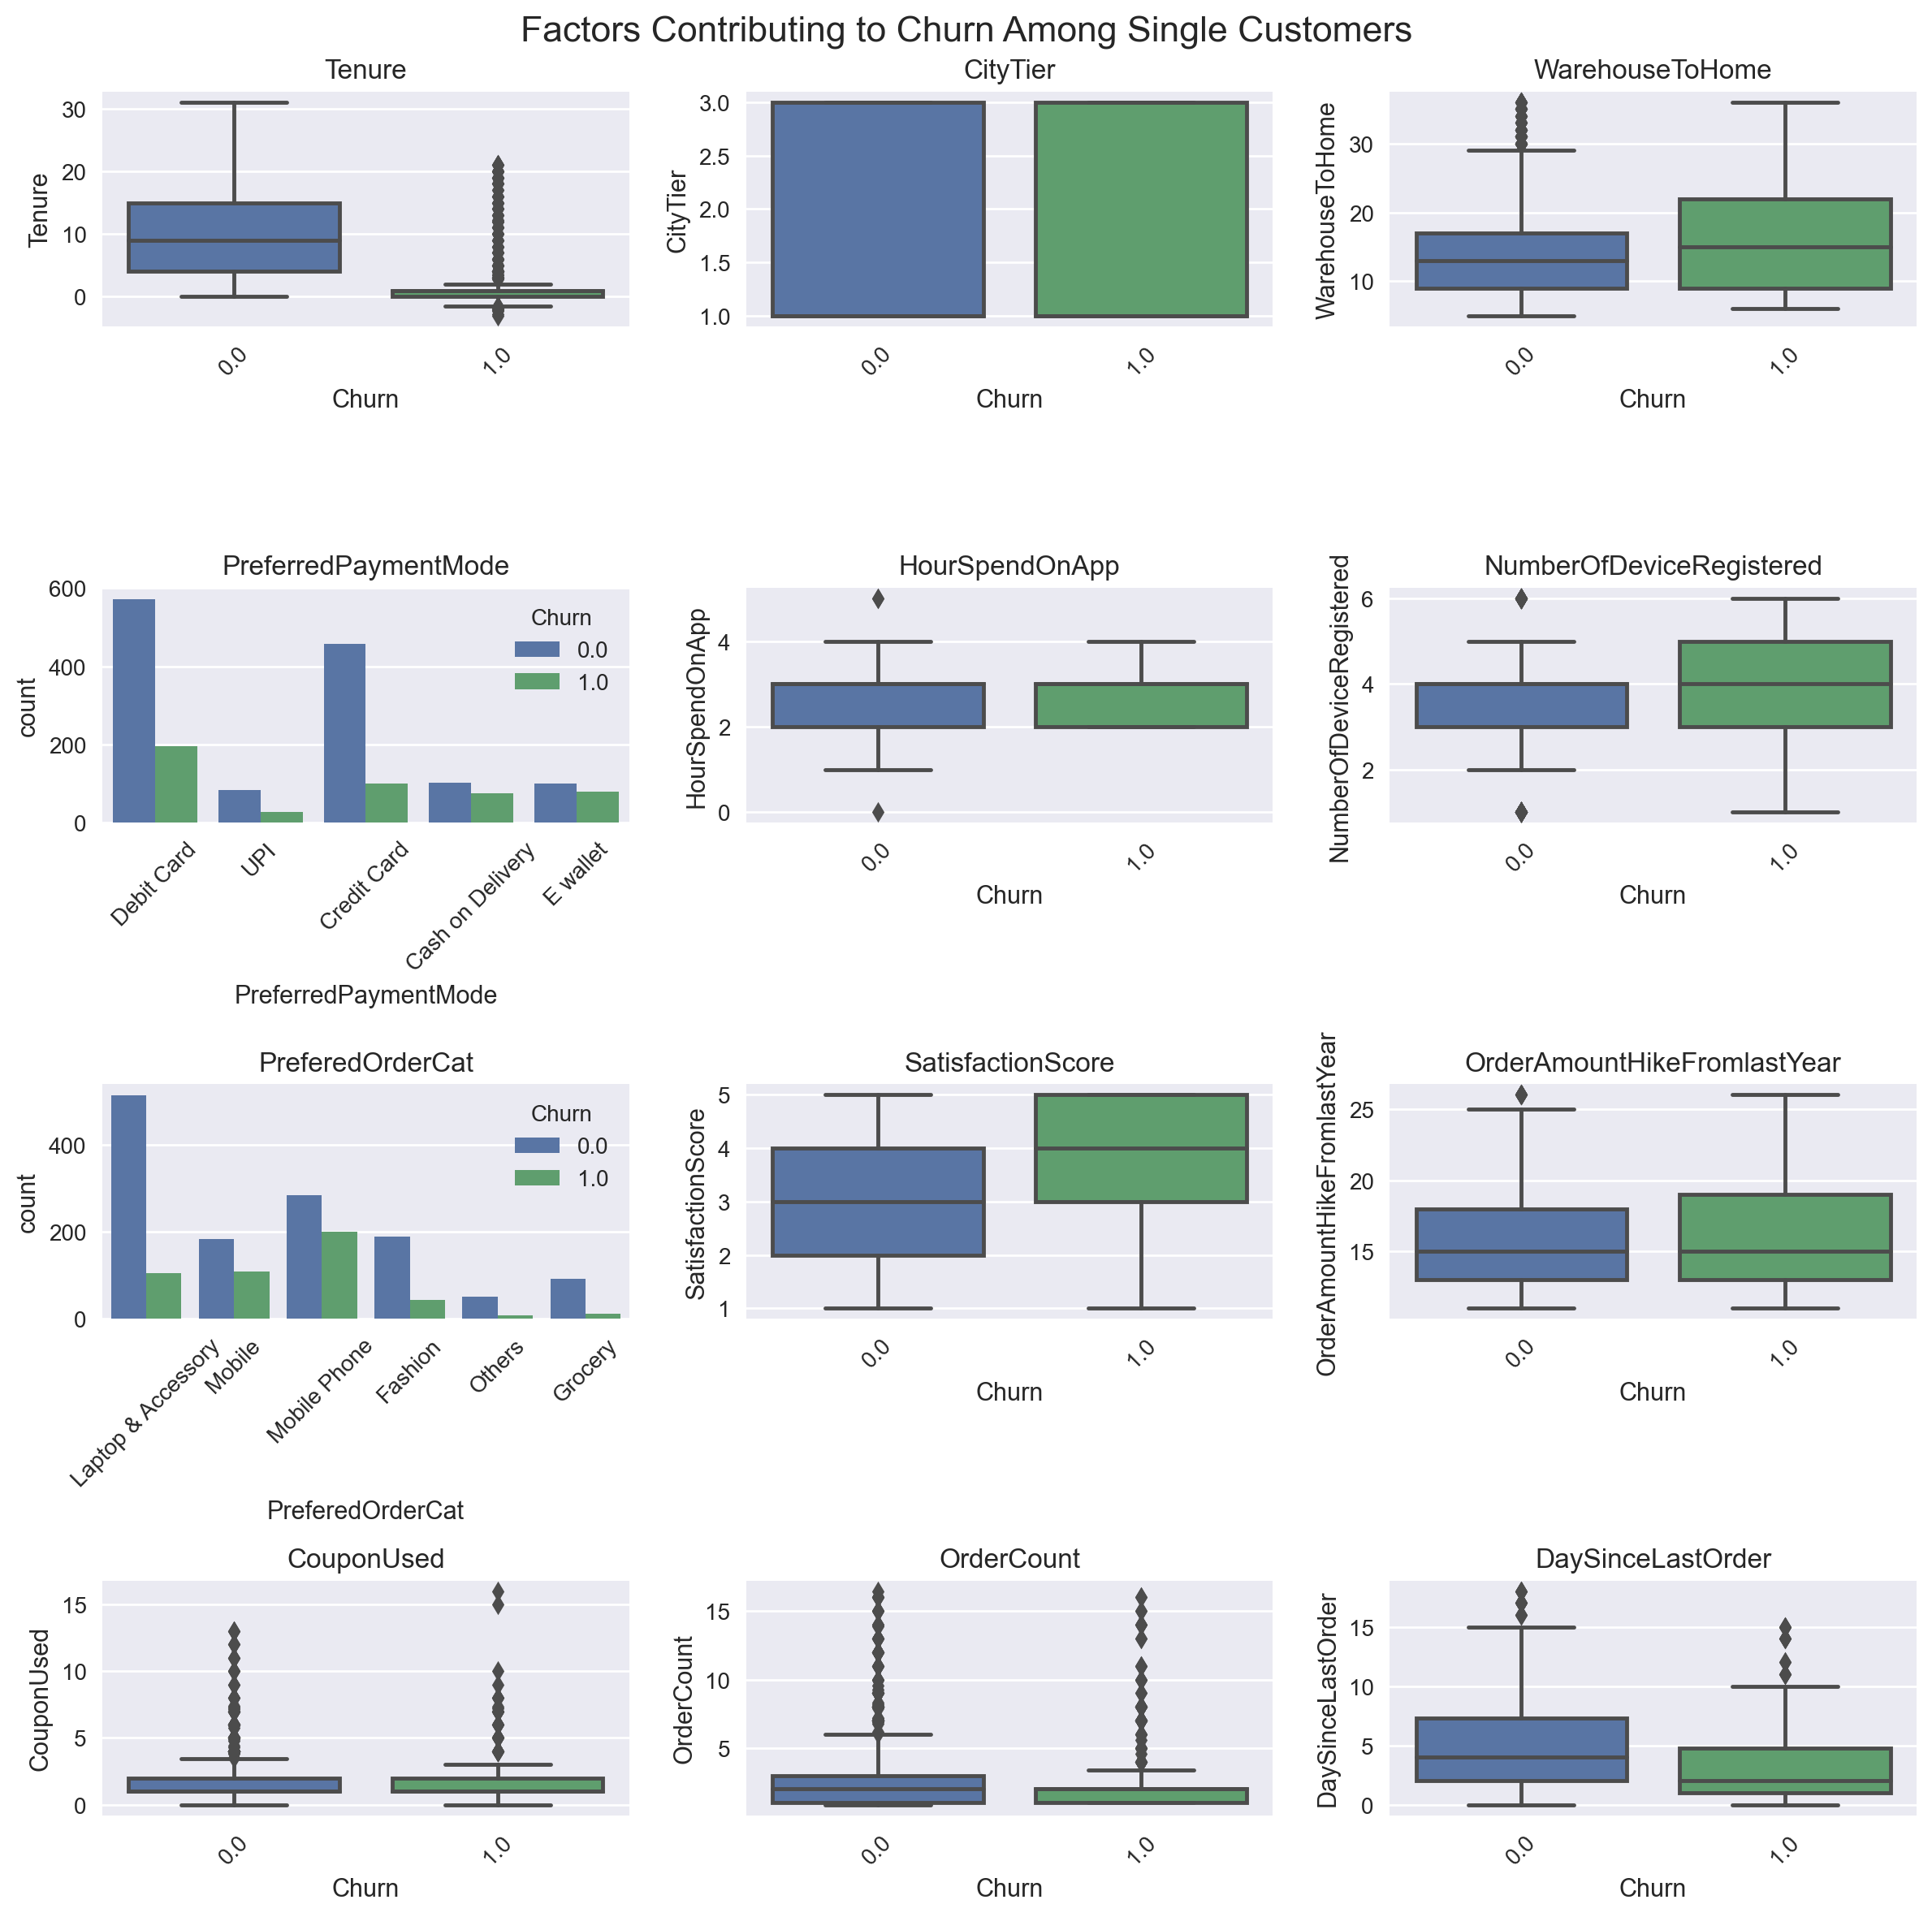

In [205]:
# Filter for single customers
single_customers = df[df['MaritalStatus'] == 'Single']

# Compare churn rates
churn_rate_single = single_customers['Churn'].mean()
churn_rate_overall = df['Churn'].mean()

print(f"Churn rate for single customers: {churn_rate_single:.2%}")
print(f"Overall churn rate: {churn_rate_overall:.2%}")

# Analyze factors for single customers
factors = ['Tenure', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 
           'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 
           'SatisfactionScore', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
           'OrderCount', 'DaySinceLastOrder']

fig, axes = plt.subplots(4, 3, figsize=(12, 12), dpi=200)
fig.suptitle('Factors Contributing to Churn Among Single Customers', fontsize=16)

for i, factor in enumerate(factors):
    ax = axes[i // 3, i % 3]
    if df[factor].dtype in ['int64', 'float64']:
        sns.boxplot(x='Churn', y=factor, data=single_customers, ax=ax)
    else:
        sns.countplot(x=factor, hue='Churn', data=single_customers, ax=ax)
    ax.set_title(factor)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Note**: Here is the list of factors contributing to higher churn among single customers: lower tenure, higher warehouse-to-home distance, and fewer orders.

#### **Q5. Do churners have any preference in terms of order category?**

In [206]:
order_df = (df.groupby(['Churn', 'PreferedOrderCat'])
             .agg(func={'PreferedOrderCat':'count'})
             .rename(columns={'PreferedOrderCat':'Count'})
             .reset_index()
             .sort_values(by='Count', ascending=False))
order_df

Churn    PreferedOrderCat  Count
2     0.0  Laptop & Accessory   1840
4     0.0        Mobile Phone    921
0     0.0             Fashion    698
3     0.0              Mobile    589
1     0.0             Grocery    390
10    1.0        Mobile Phone    350
5     0.0              Others    244
9     1.0              Mobile    220
8     1.0  Laptop & Accessory    210
6     1.0             Fashion    128
7     1.0             Grocery     20
11    1.0              Others     20

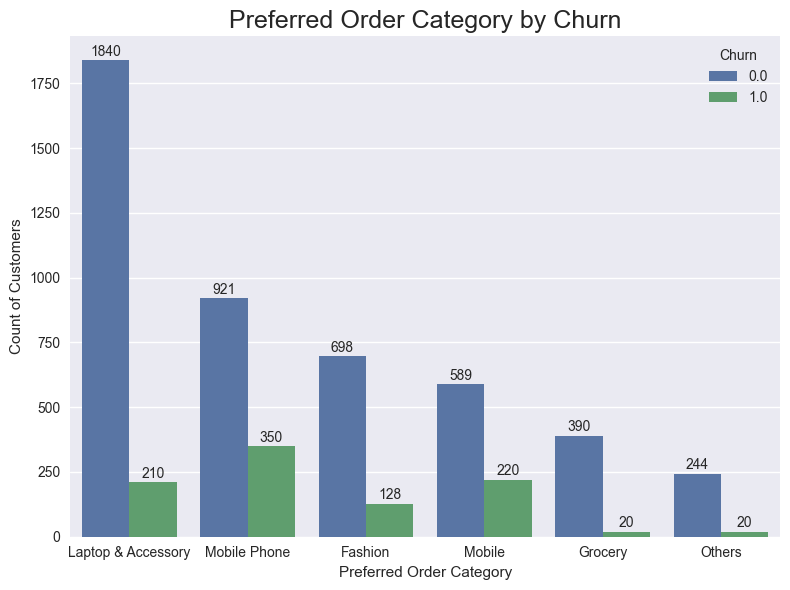

In [207]:
plt.figure(figsize=(8, 6))
plot5 = sns.barplot(x='PreferedOrderCat', y='Count', hue='Churn', data=order_df)

# add labels
for bar in plot5.patches:
  height = bar.get_height()
  label_text = int(height)                      # extract count value from bar height
  x_pos = bar.get_x() + bar.get_width() / 2     # center label horizontally
  y_pos = height + 5                            # adjust vertical position slightly above bar
  plot5.text(x_pos, y_pos, label_text, ha='center', va='bottom', fontsize=10)

plt.xlabel('Preferred Order Category')
plt.ylabel('Count of Customers')
plt.title('Preferred Order Category by Churn', fontsize=18)
plt.xticks(rotation=0, ha='center')  
plt.tight_layout()
plt.show()

In [208]:
# calculate the total count 
total_counts = order_df.groupby('PreferedOrderCat')['Count'].sum().reset_index()
total_counts = total_counts.rename(columns={'Count': 'TotalCount'})

# calculate the count of churned customers
churned_counts = order_df[order_df['Churn'] == 1.0][['PreferedOrderCat', 'Count']]
churned_counts = churned_counts.rename(columns={'Count': 'ChurnedCount'})

# combine total counts with the churned counts
churn_rate_df = pd.merge(total_counts, churned_counts, on='PreferedOrderCat', how='left')
churn_rate_df['ChurnedCount'] = churn_rate_df['ChurnedCount'].fillna(0)

# get the churn rate
churn_rate_df['ChurnRate'] = (churn_rate_df['ChurnedCount'] / churn_rate_df['TotalCount']*100).round(2)

churn_rate_df.sort_values(by='ChurnRate', ascending=False)

PreferedOrderCat  TotalCount  ChurnedCount  ChurnRate
4        Mobile Phone        1271           350      27.54
3              Mobile         809           220      27.19
0             Fashion         826           128      15.50
2  Laptop & Accessory        2050           210      10.24
5              Others         264            20       7.58
1             Grocery         410            20       4.88

**Note**: 
- As can be seen on the bar chart and the table, customers who bought electronic devices are more likely to churn.
- The churn rates for customers who prefer to order `Mobile Phones` (27.54%) and `Mobile` (27.19%) are significantly higher than other categories.
- These rates are almost double that of the `Fashion` category (15.50%) and several times higher than categories like `Laptop & Accessory` (10.24%), `Others` (7.58%), and `Grocery` (4.88%).
- The high churn rate in electronic devices and accessories may be best attributed to the product lifecyle. They are typically bought once and used for an extended period before being replaced. This leads to lower repeat purchase rates within a short time frame, and as a result leading to a natural churn as the customers are not making frequent purchases.
- As it is not possible to dig deeper to test product lifecycle, the following code only add more details on the characteristics of customers who churned and ordered mobile phone.

Churn rate for customers ordering mobile phones: 27.54%
Overall churn rate: 16.84%


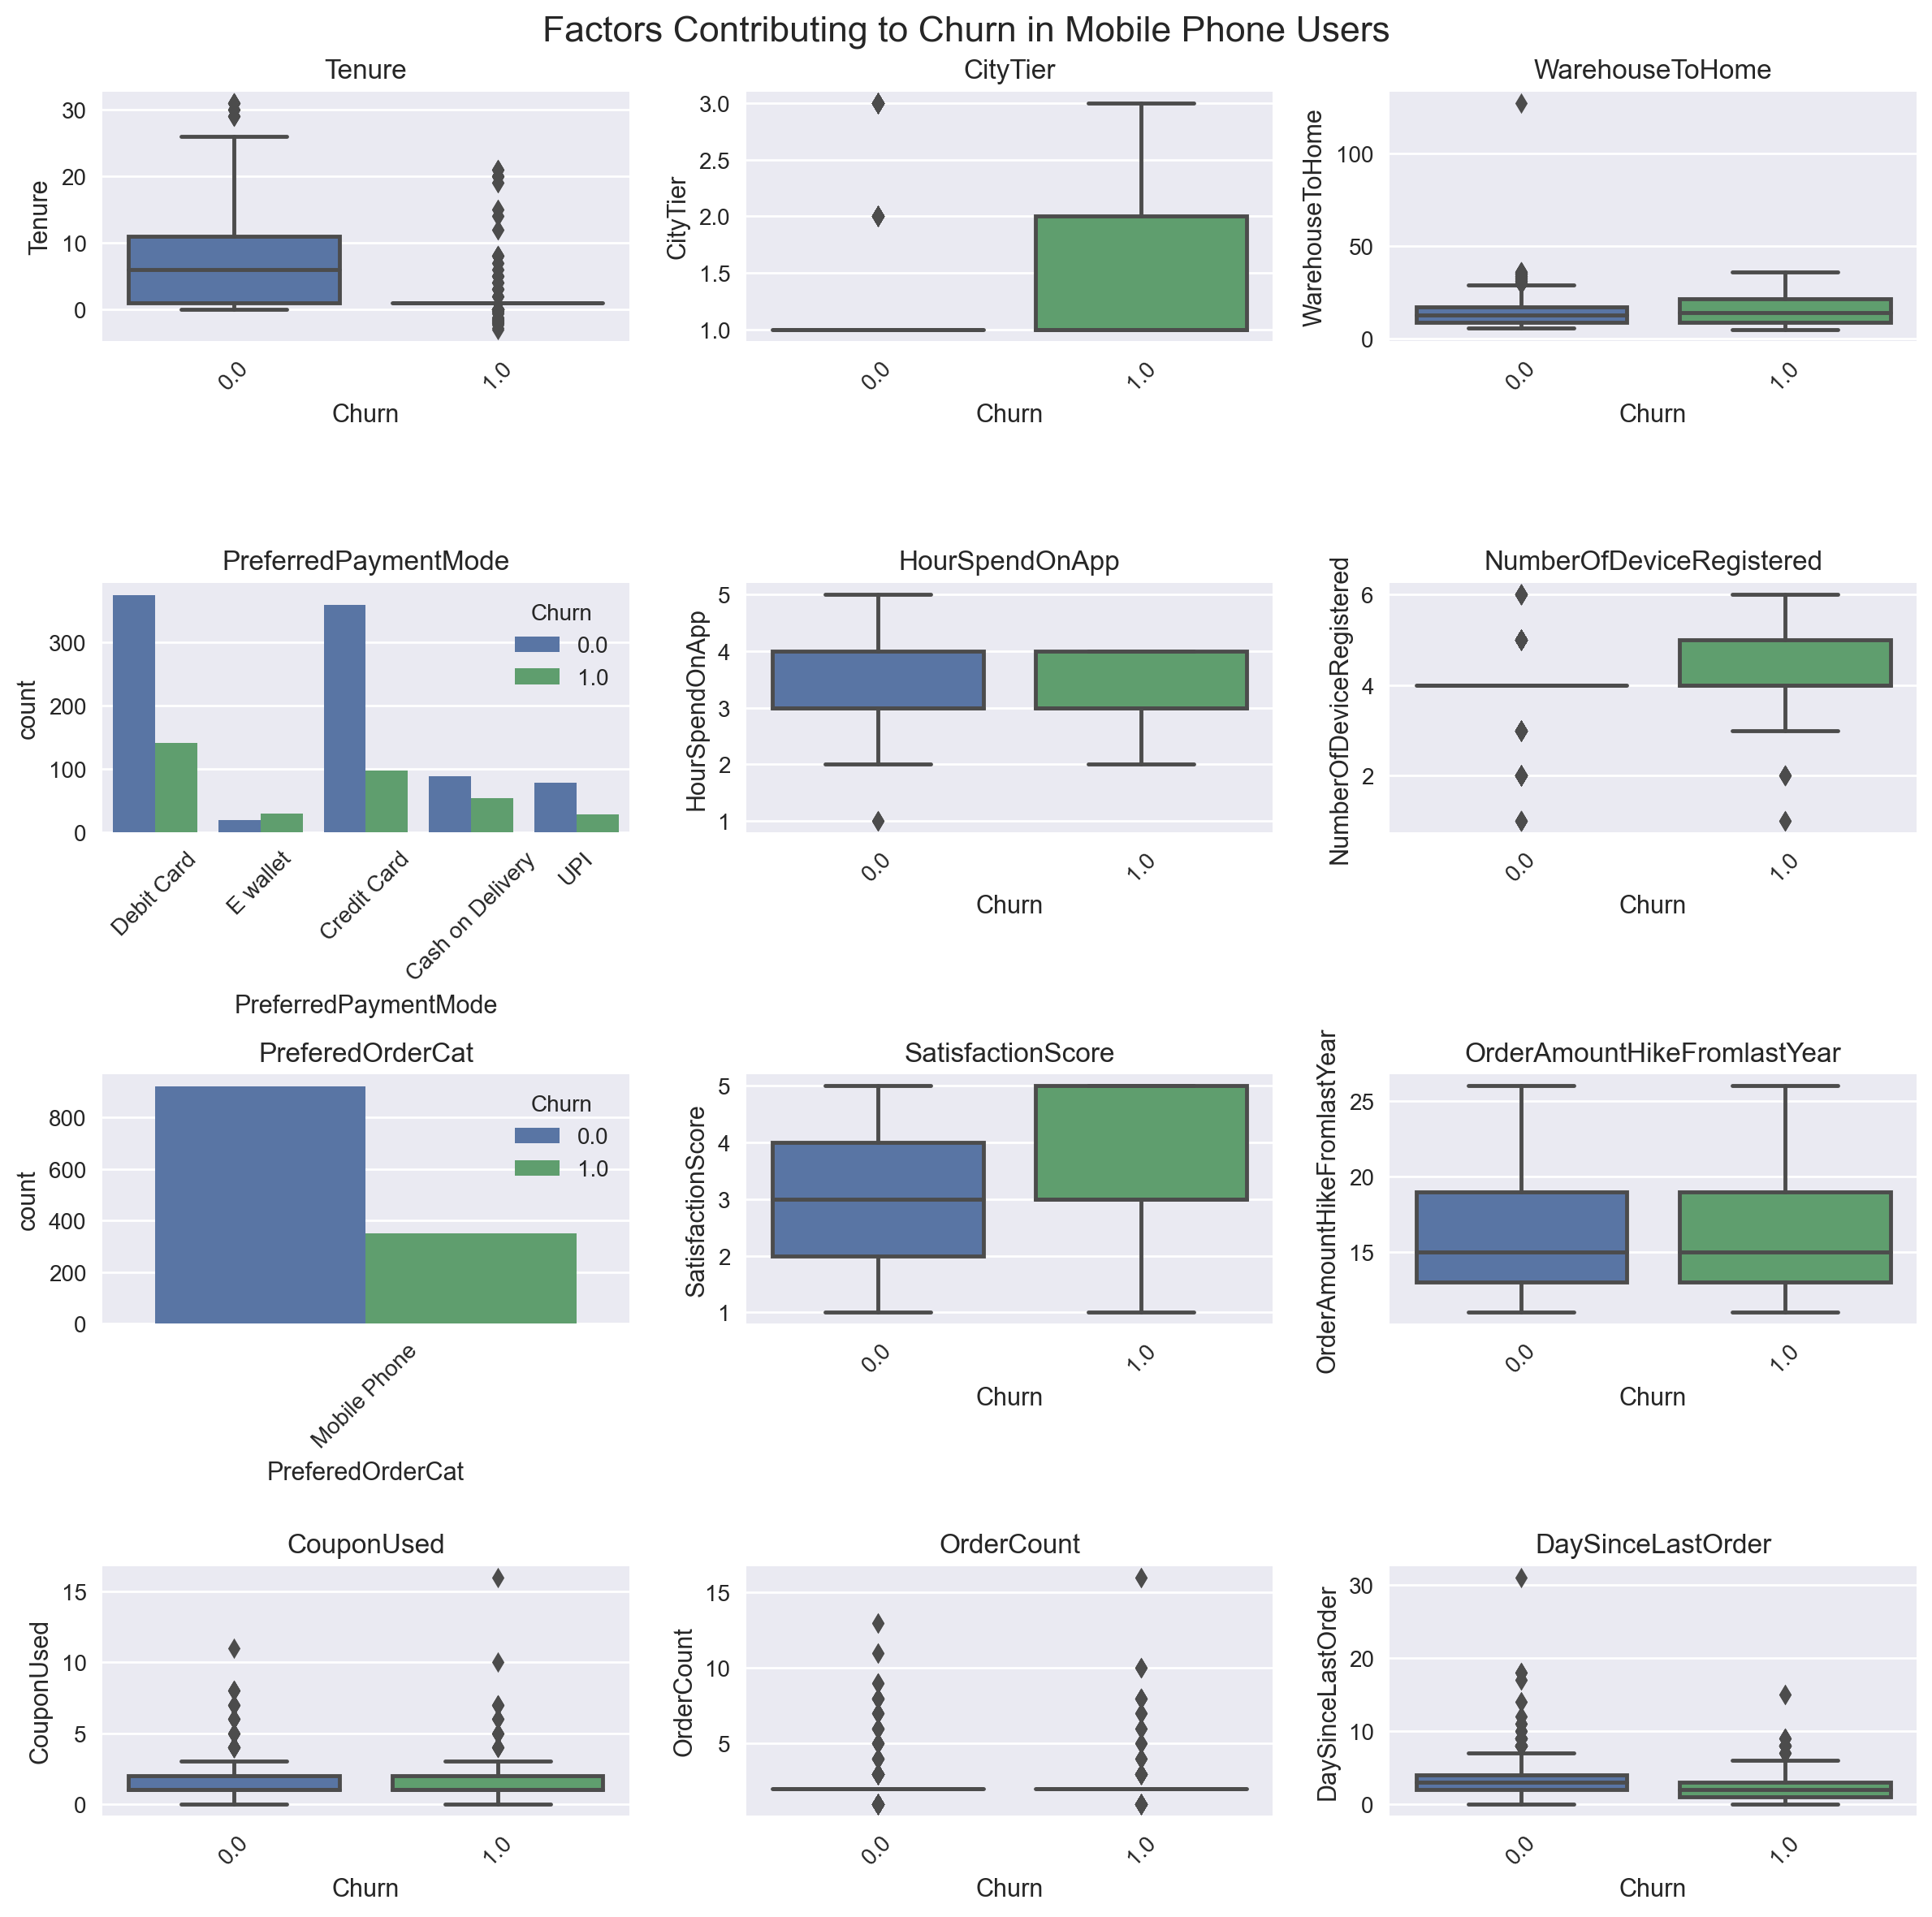

In [209]:
# Filter for single customers
order_cat = df[df['PreferedOrderCat'] == 'Mobile Phone']

# Compare churn rates
churn_rate_mobilephone = order_cat['Churn'].mean()
churn_rate_overall = df['Churn'].mean()

print(f"Churn rate for customers ordering mobile phones: {churn_rate_mobilephone:.2%}")
print(f"Overall churn rate: {churn_rate_overall:.2%}")

# Analyze factors for single customers
factors = ['Tenure', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 
           'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 
           'SatisfactionScore', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
           'OrderCount', 'DaySinceLastOrder']

fig, axes = plt.subplots(4, 3, figsize=(12, 12), dpi=200)
fig.suptitle('Factors Contributing to Churn in Mobile Phone Users', fontsize=16)

for i, factor in enumerate(factors):
    ax = axes[i // 3, i % 3]
    if df[factor].dtype in ['int64', 'float64']:
        sns.boxplot(x='Churn', y=factor, data=order_cat, ax=ax)
    else:
        sns.countplot(x=factor, hue='Churn', data=order_cat, ax=ax)
    ax.set_title(factor)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Note**
- The plots above provides us with charcteristics of customers who ordered mobile phones. 
- As shown on the plots, customers ordering mobile phones with shorter tenure and more recent order tend to churn.

<div class="alert alert-block alert-warning">
<b>Summary (to revisit)</b><br>

- Mobile Phone users have a higher churn rate compared to Phone users

- City Tier 1 has the highest churn rate

- Cash on Delivery payment mode shows higher churn

- Males have a slightly higher churn rate

- Mobile category has the highest churn rate

- Single customers are more likely to churn
</div>

### **3.2 Numerical Features**

#### **Q1. Are there any features highly correlated with churns?**

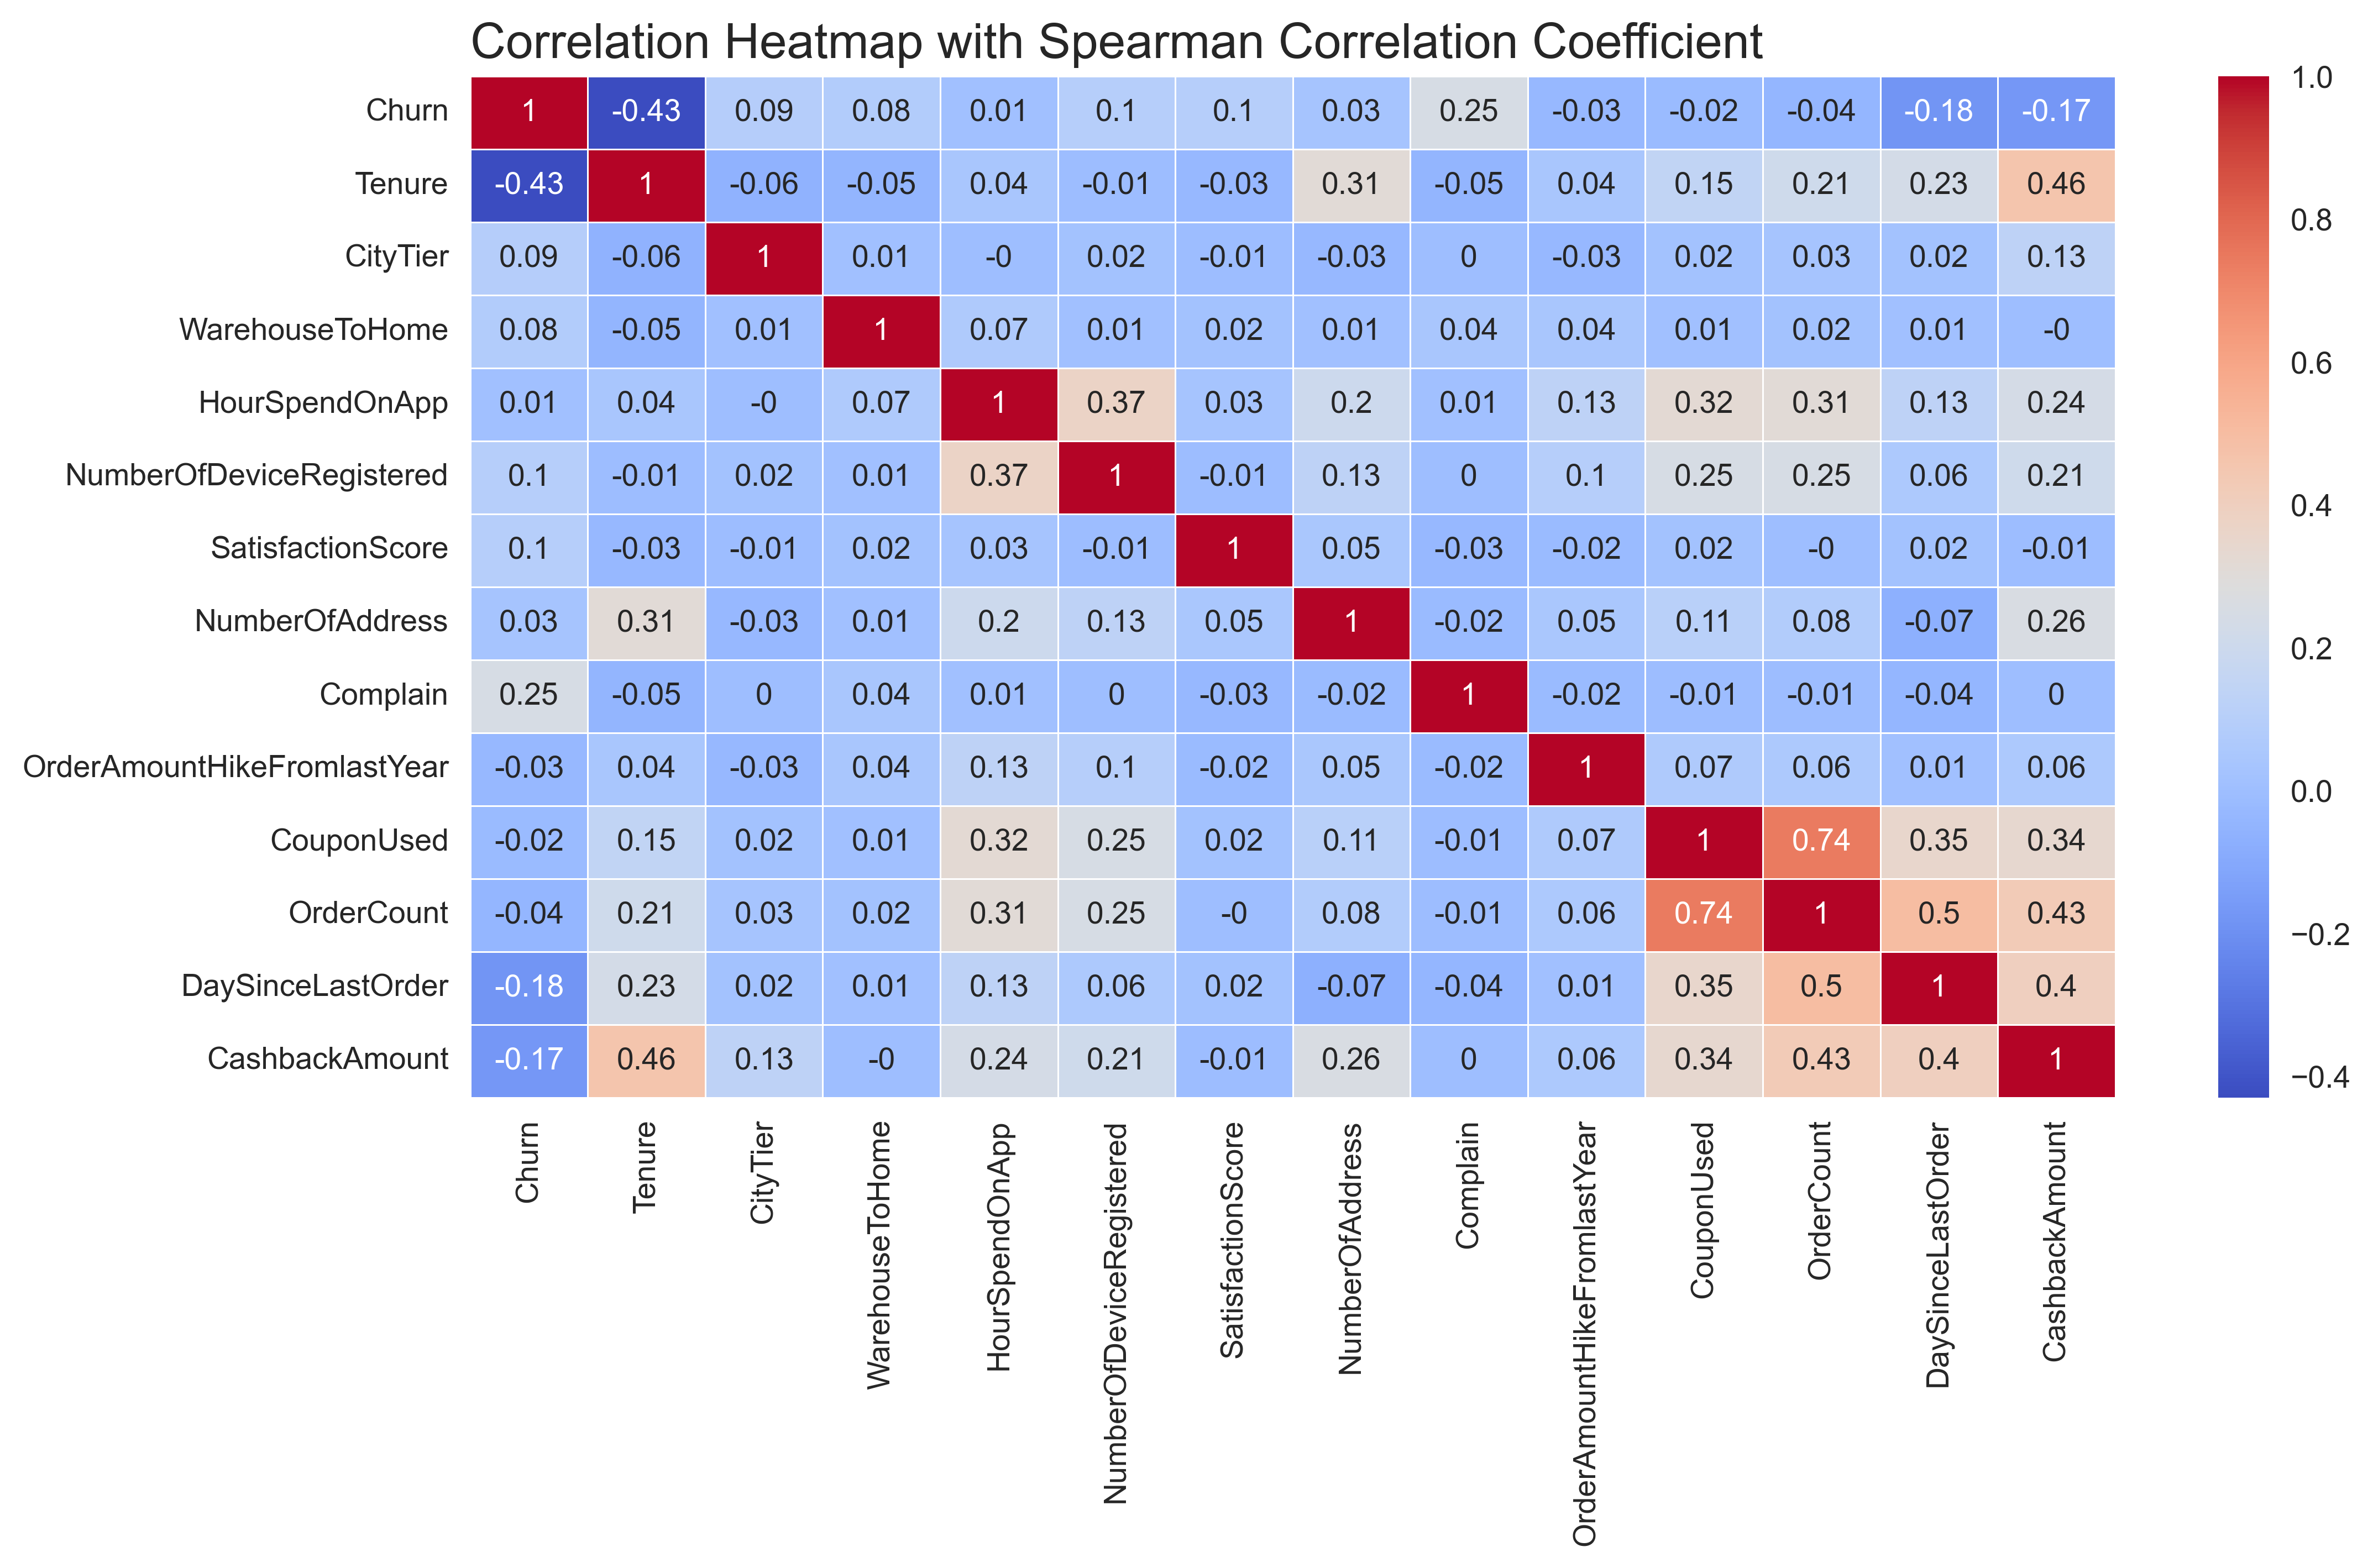

In [ ]:
plt.figure(figsize=(12, 6), dpi=400)
cols_to_plot = ['Churn', 'Tenure', 'CityTier',
                'WarehouseToHome','HourSpendOnApp', 
                'NumberOfDeviceRegistered', 'SatisfactionScore',
                'NumberOfAddress', 'Complain', 
                'OrderAmountHikeFromlastYear',
                'CouponUsed', 'OrderCount',
                'DaySinceLastOrder', 'CashbackAmount']

correlation_matrix = df[cols_to_plot].corr(numeric_only=True, method='spearman').round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Spearman Correlation Coefficient', loc='left', fontsize=16)
plt.show()

**Note**
- Only some variables are highly correlated to each other.
    - Variable `CouponUsed` and `OrderCount` appear to have high positive correlation ($\rho$ = 0.74). $\rightarrow$ more coupons, more orders
    - This strong correlation indicates a substantial relationship between the number of coupons and number of orders, suggesting coupons might be a significant driver of order counts among customers. As a result, it is possible that customers are actively seeking discounts.
- The rest variables have weak to moderate correlations. For moderate correlation, `OrderCount` vs `DaySincelastOrder` ($\rho$ = 0.5), `OrderCount` vs `CashbackAmount` ($\rho$ = 0.43), and `Tenure` vs `CashbackAmount` ($\rho$ = 0.46).
- To avoid simpson's paradox, we split the correlation test into two based on the churn status (as it is our primary concern).
    - Simpson's paradox is when a trend in the data appears but disappears when the data is subsetted. 
    - This phenomenon happens due to the presence of confounding variable, i.e., another variable influencing both dependent and independent variable.


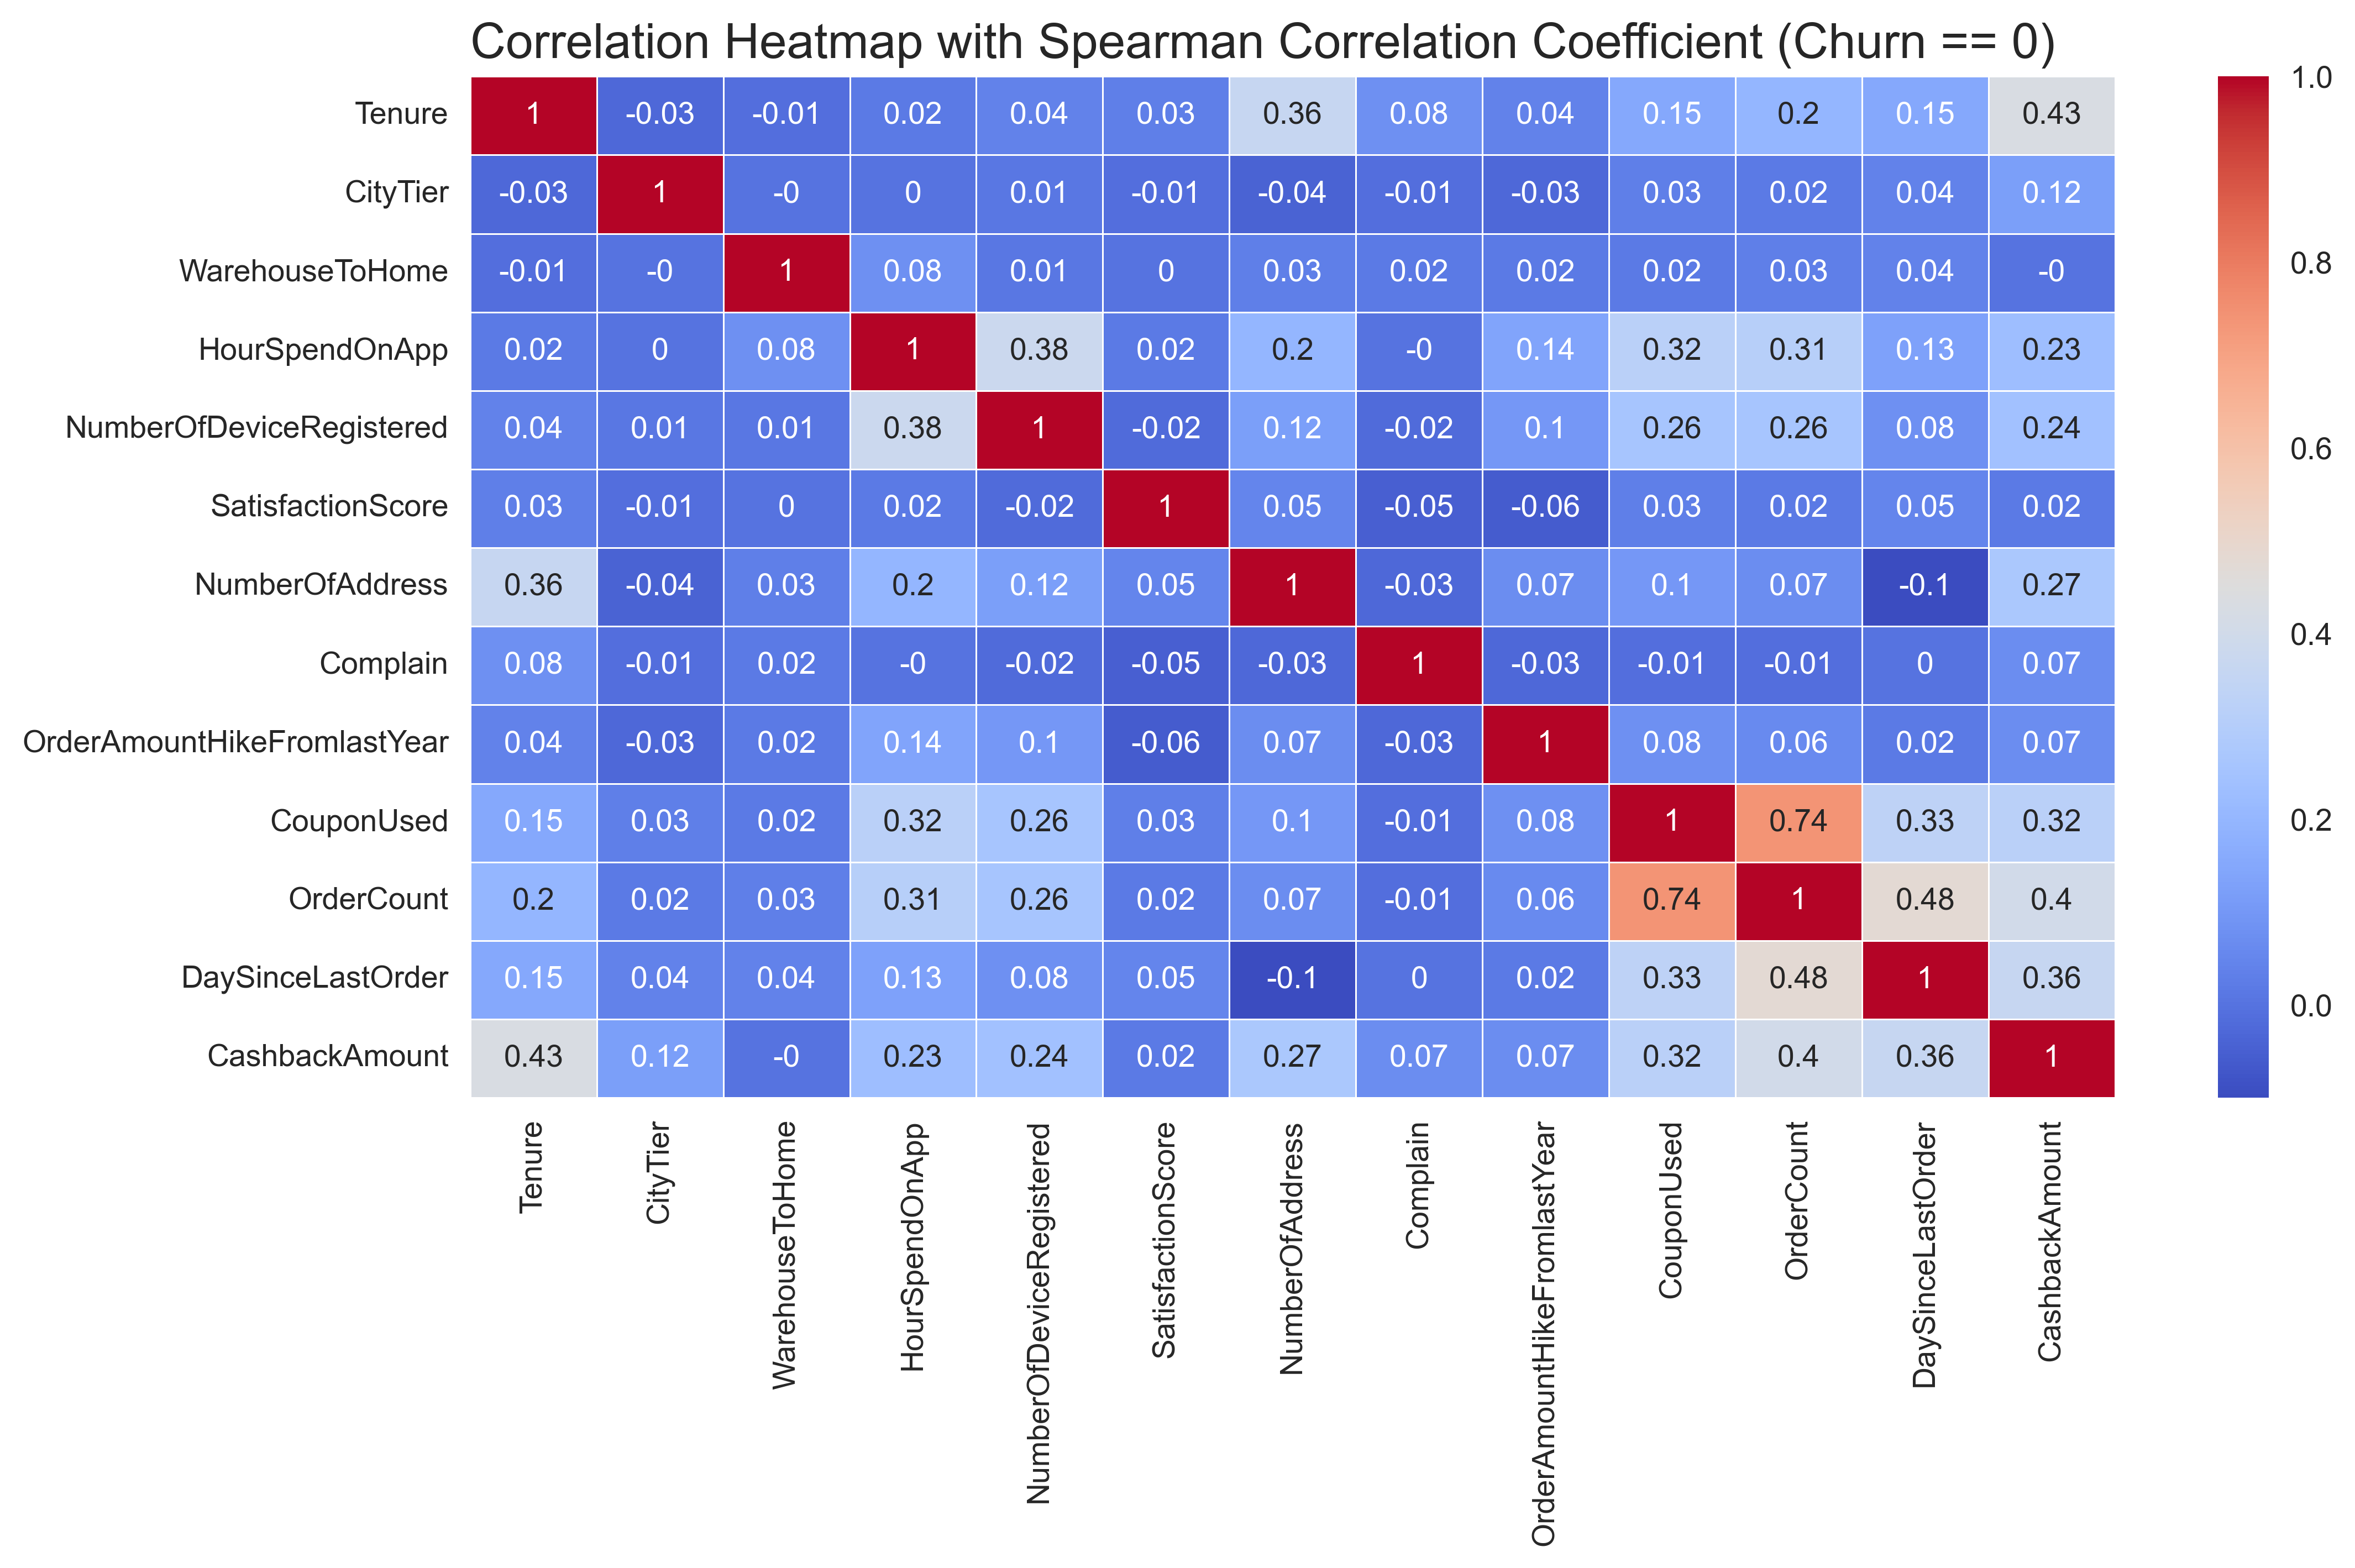

In [ ]:
# Define the columns to plot
cols_to_plot = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
                'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 
                'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
                'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Filter the DataFrame for rows where Churn == 0
filtered_df = df[df['Churn'] == 0]

# Compute the correlation matrix for the filtered DataFrame
correlation_matrix = filtered_df[cols_to_plot].corr(method='spearman').round(2)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 6), dpi=400)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Spearman Correlation Coefficient (Churn == 0)', loc='left', fontsize=16)
plt.show()

**Note**
- In general, the relationship patterns between variables in the first group (customers who stay (`Churn` == `0`)) are similar.
    - Strong: CouponUsed vs OrderCount
    - Moderate: OrderCount vs DaySincelastOrder, OrderCount vs CashbackAmount, and Tenure vs CashbackAmount.
- The similar patterns between the first subgroup and the general group (all customers regardless of their churn status) indicate that the relationships between the variables are not influenced by the subgroup (Churn == 0).
- To confirm this finding, we will analyze the second group (`Churn` == `1`). If the patterns are also similar, we can tell there is no evidence that relationship between variables behaves differently for different groups.

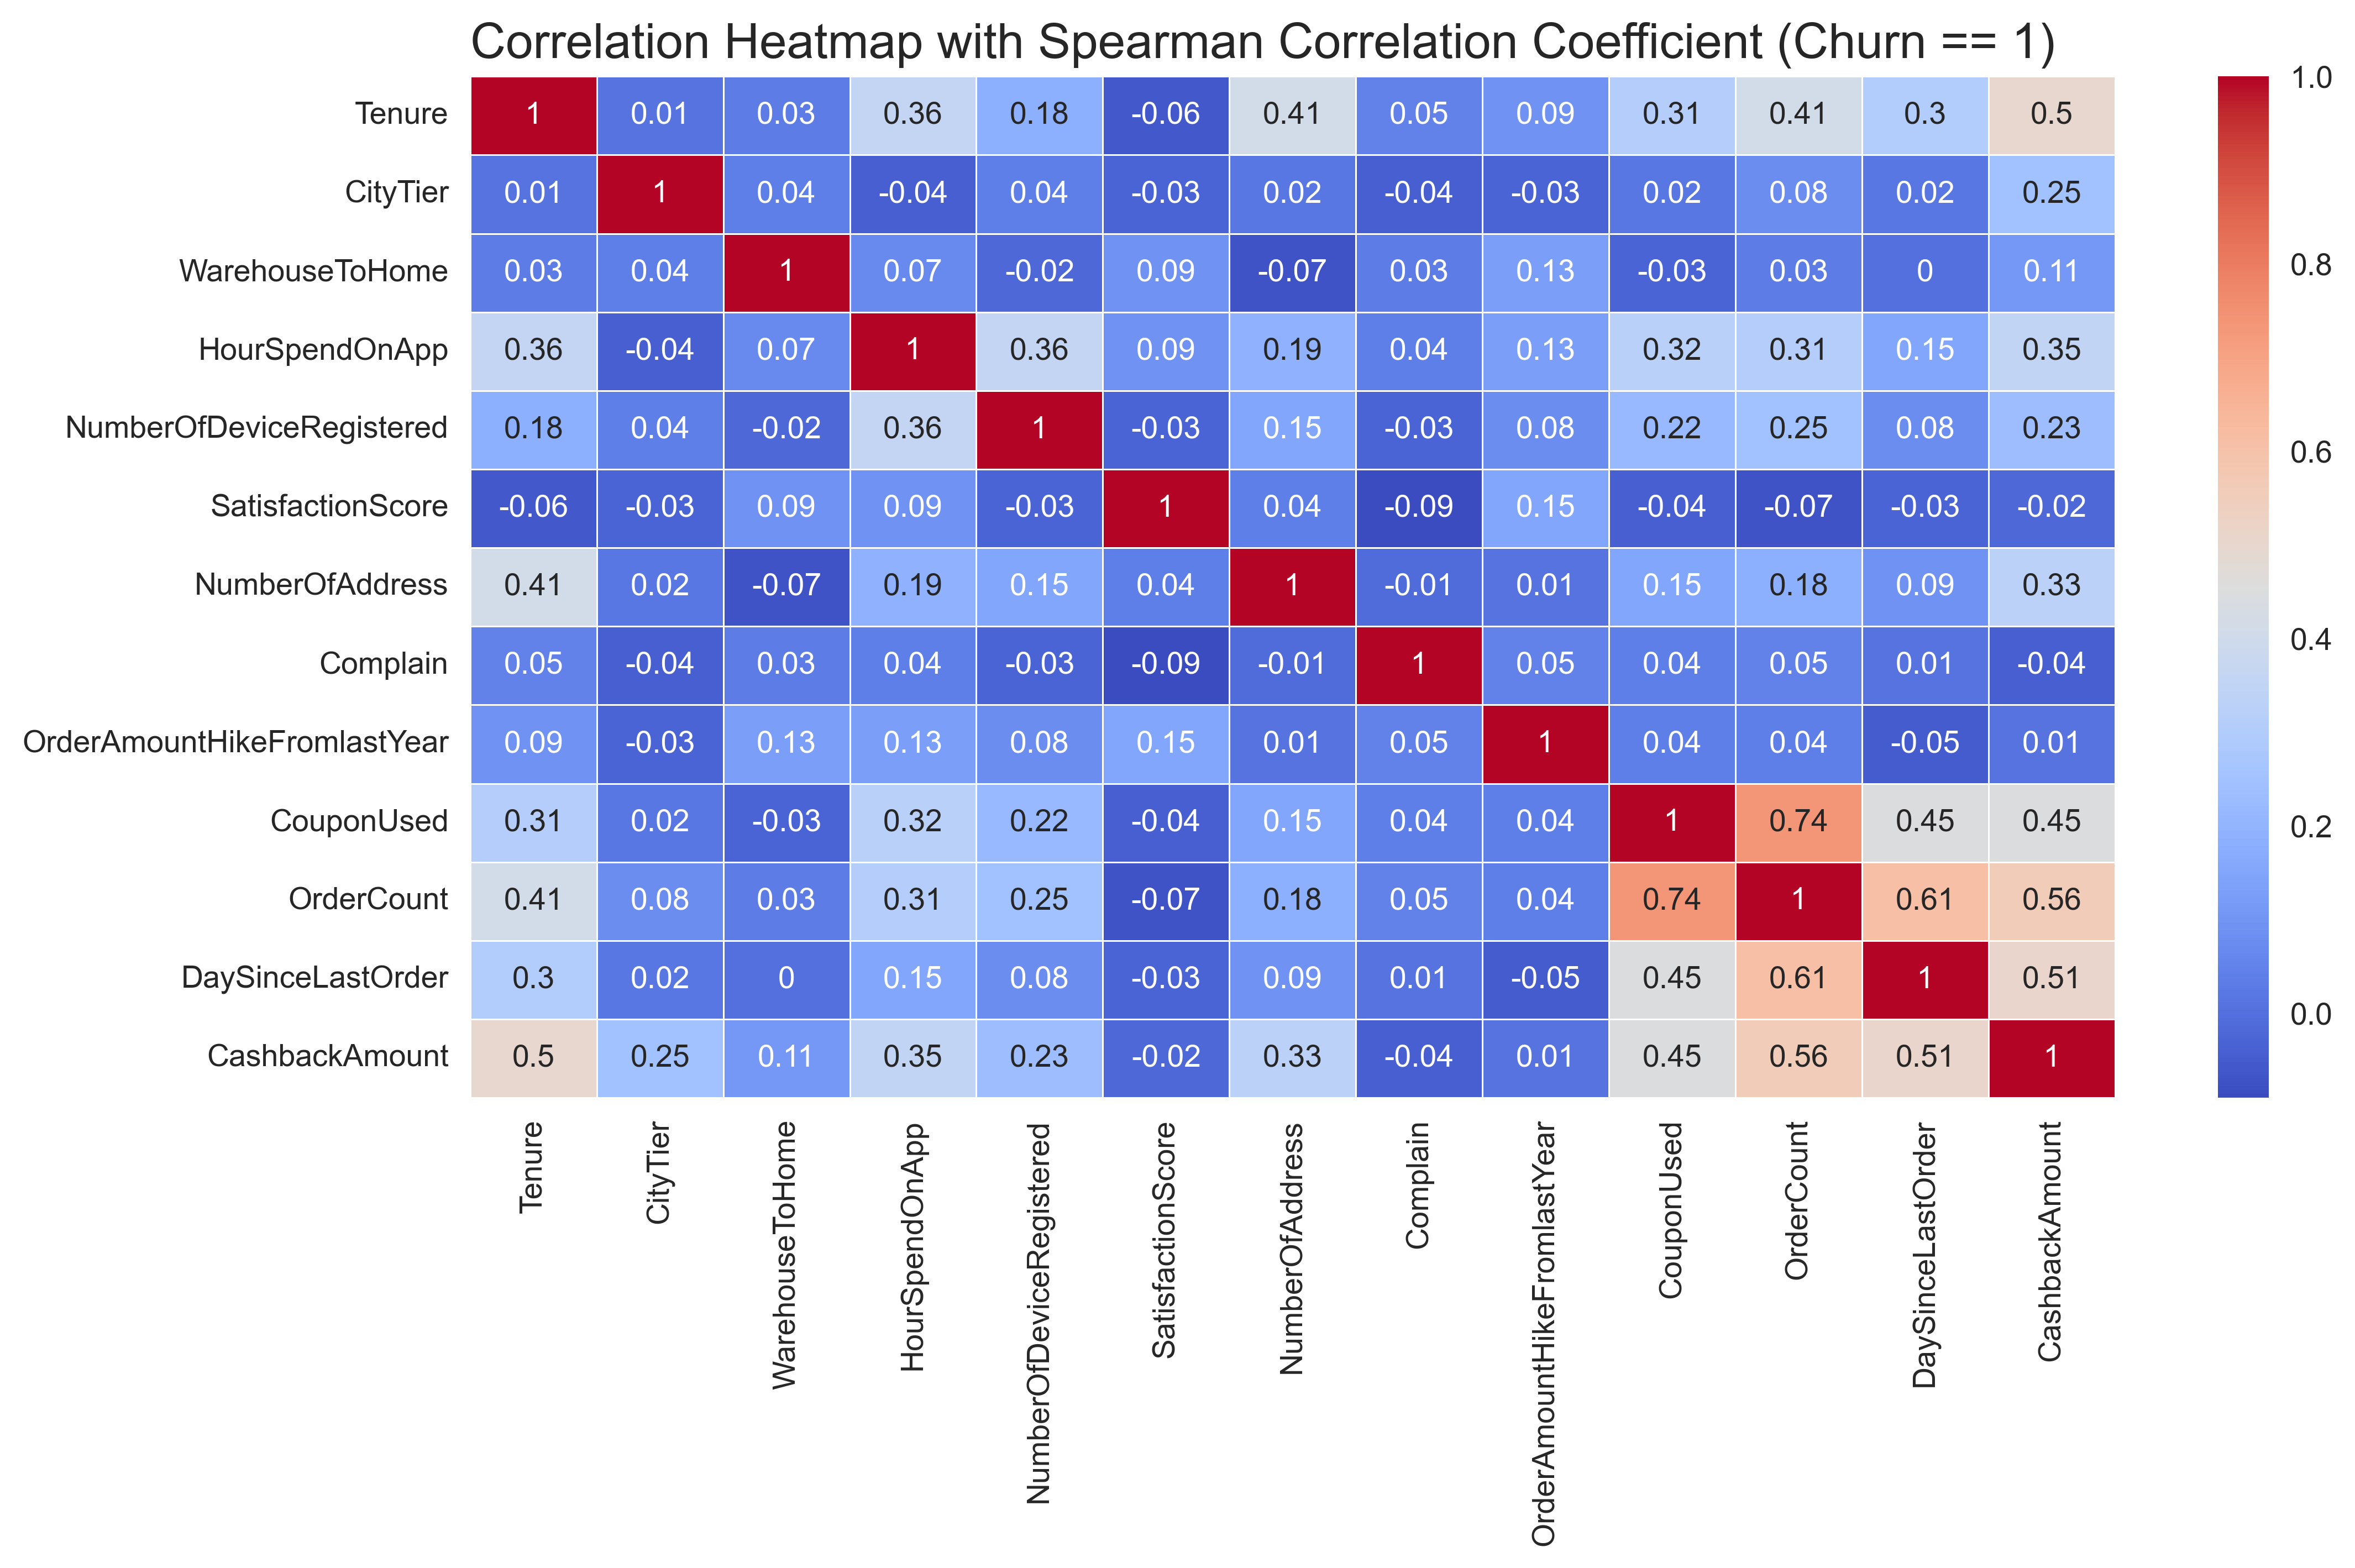

In [ ]:
# Define the columns to plot
cols_to_plot = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 
                'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 
                'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 
                'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Filter the DataFrame for rows where Churn == 1
filtered_df = df[df['Churn'] == 1]

# Compute the correlation matrix for the filtered DataFrame
correlation_matrix = filtered_df[cols_to_plot].corr(method='spearman').round(2)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 6), dpi=400)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap with Spearman Correlation Coefficient (Churn == 1)', loc='left', fontsize=16)
plt.show()

**Note**
- While there are slight differences in the magnitude of correlations, the patterns in the second group (`Churn` == `1`) are similar to the overall. The similar patterns across groups, therefore, underscore the absence of Simpson's paradox in the dataset.
- CouponUsed vs OrderCount exhibit strong positive correlation, and the following variables have medium correlations.
    - `OrderCount` vs `DaySincelastOrder`
    - `OrderCount` vs `CashbackAmount`
    - `Tenure` vs `CashbackAmount`
- What is slightly different is the correlation between CouponUsed and CashbackAmount but it still does not reject our claim that there are consistent patterns across groups (`Churn` == `0` and `Churn` == `1`).

#### **Q2. To what extent churning customers and loyal customers are different in terms of their purchasing behaviors?**

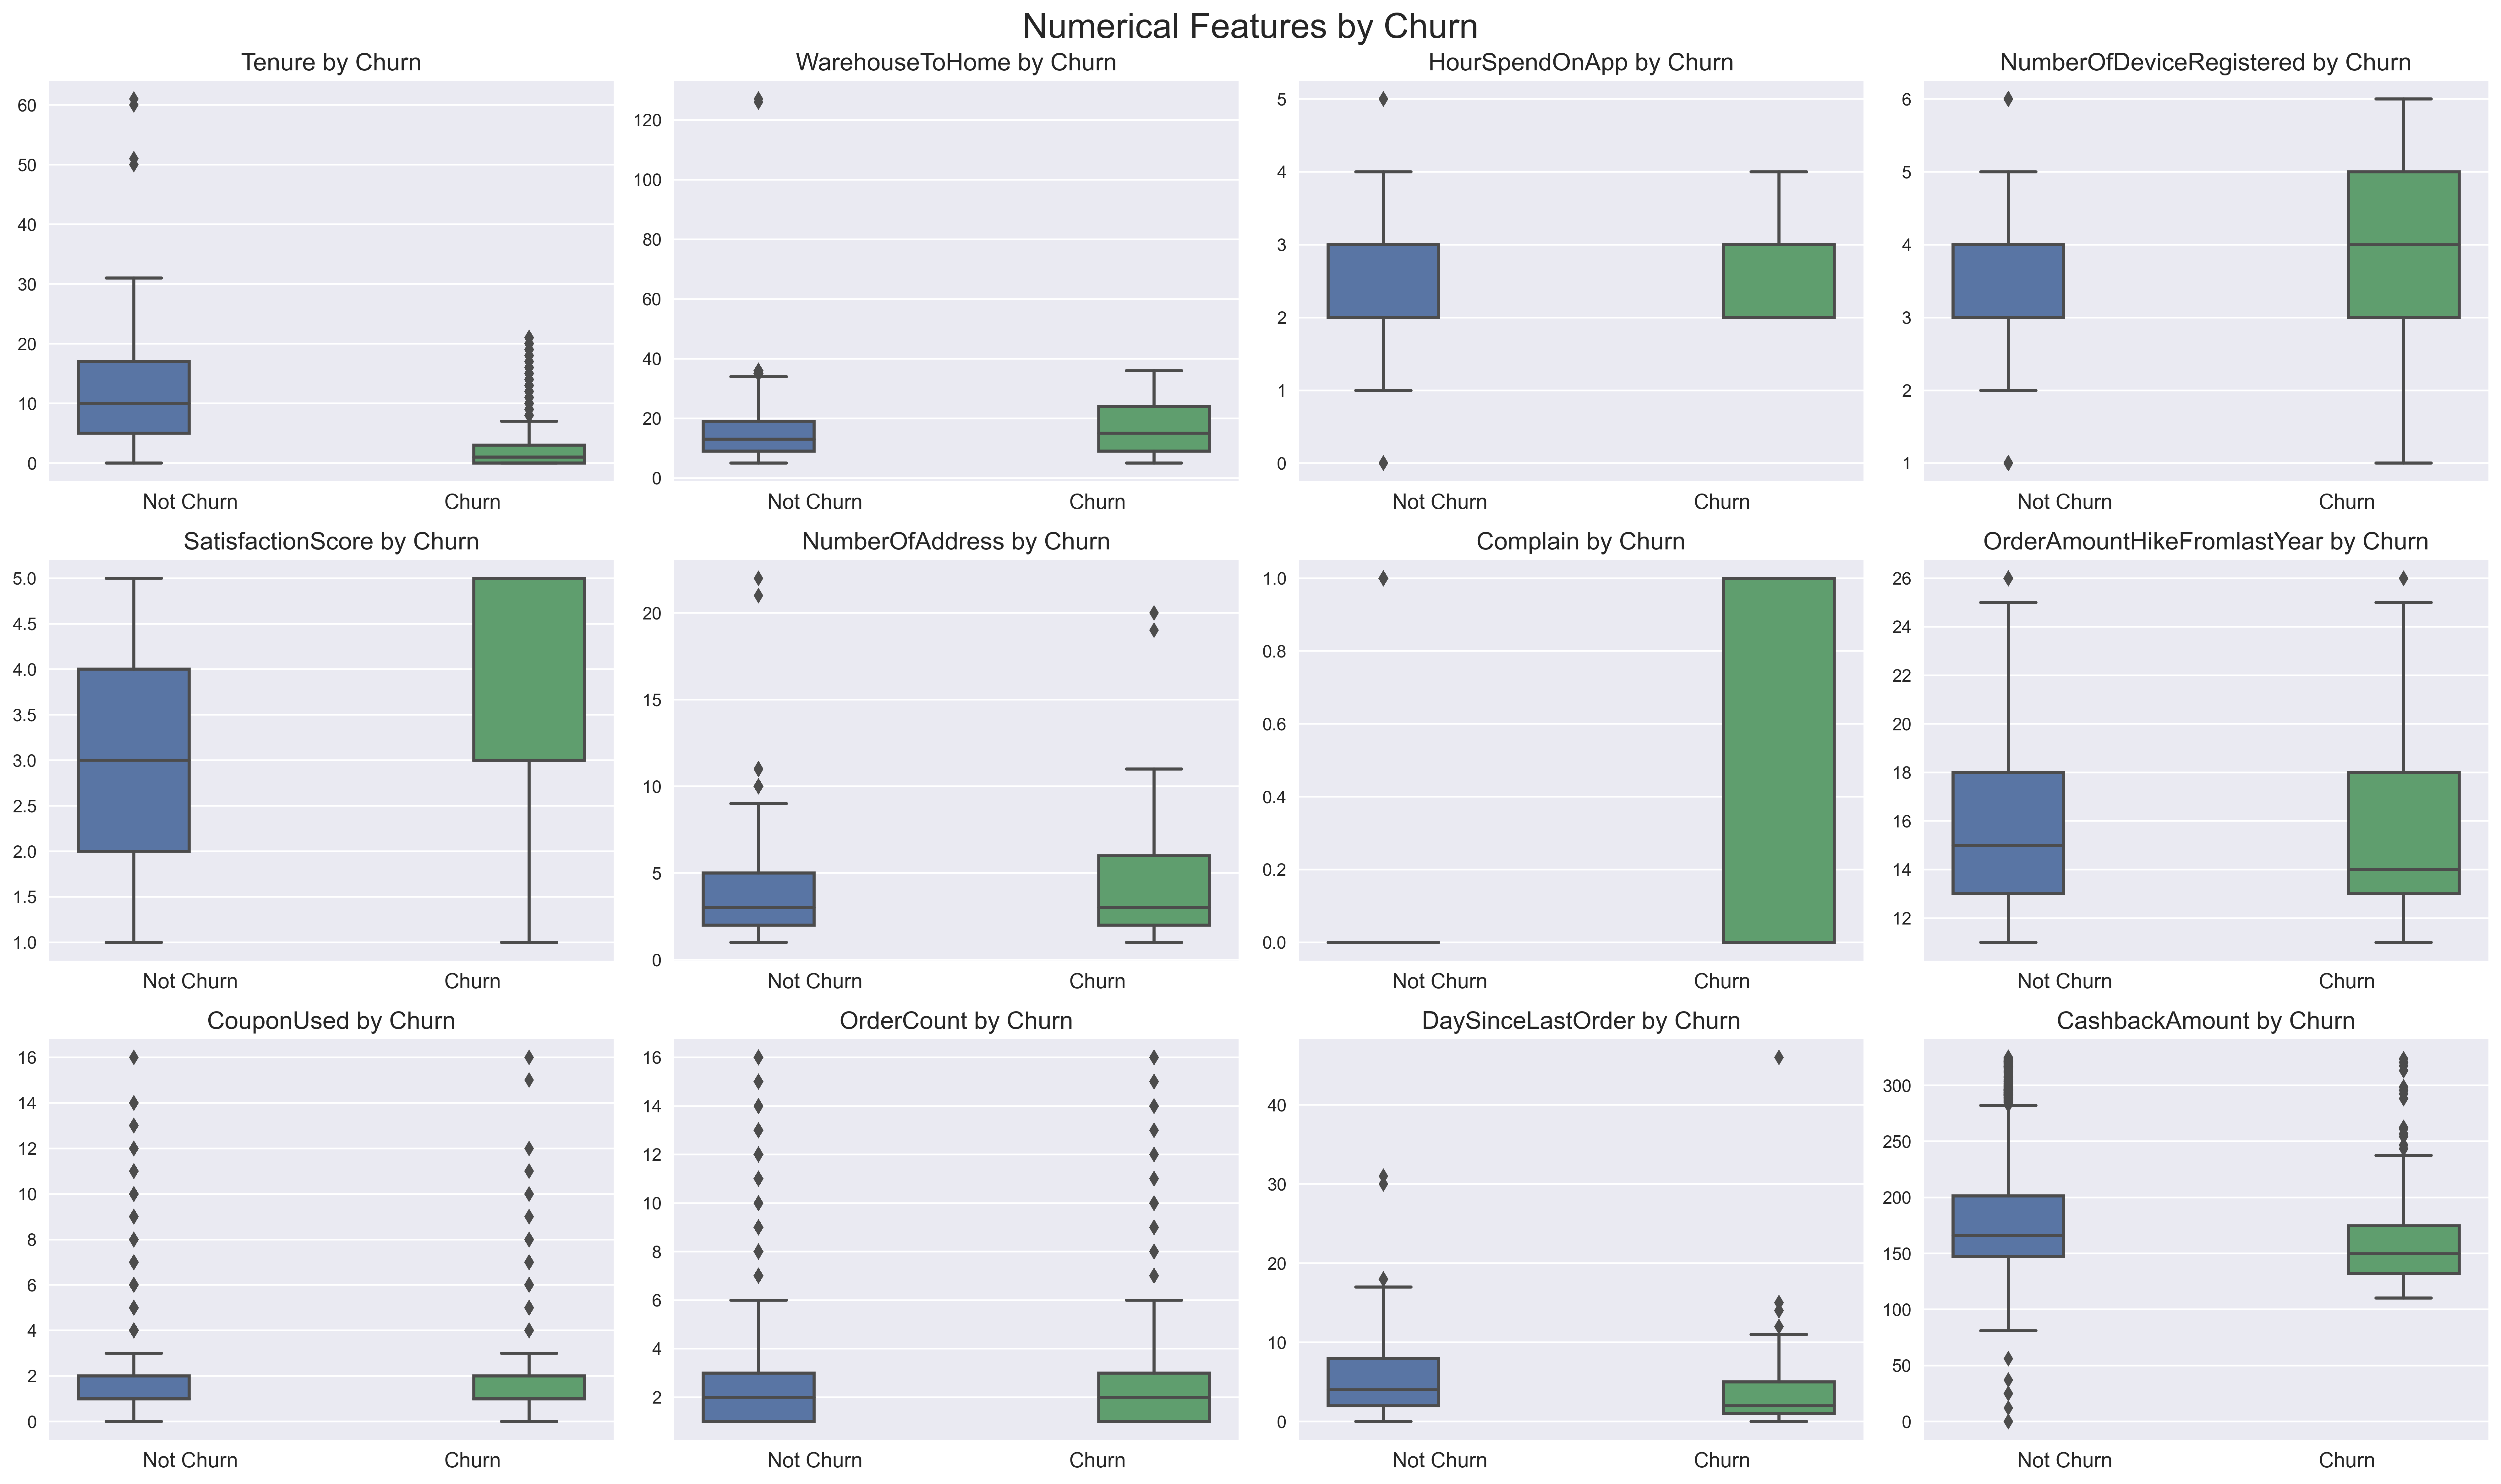

In [216]:
columns_to_plot = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                   'NumberOfDeviceRegistered', 'SatisfactionScore', 
                   'NumberOfAddress', 'Complain', 
                   'OrderAmountHikeFromlastYear', 
                   'CouponUsed', 'OrderCount', 
                   'DaySinceLastOrder',
                   'CashbackAmount']

plt.figure(figsize=(20, 12), dpi=400)
plt.suptitle('Numerical Features by Churn', fontsize=20)

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i) 
    ax = sns.boxplot(x='Churn', y=column, data=data, hue='Churn') 
    # ax = sns.violinplot(x='Churn', y=column, data=data, hue='Churn', split=True, palette='muted', legend=False)
    ax.set_xticklabels(['Not Churn', 'Churn'], fontsize=12)
    plt.title(f'{column} by Churn', fontsize=14) 
    plt.xlabel(None)
    plt.ylabel(None)
    if ax.legend_:
        ax.legend_.remove()

plt.tight_layout()
plt.show()

**Note**
- In general, churn customers tend to have shorter tenure, higher satisfaction score, more number devices registered, receive lower cashback amount, and more complaints.
- To examine whether the differences between churn and non-churn customers are statistically considerable, Mann-Whitney *U* tests are used. This non-parametric statistical test is chosen as some variables contain outliers and their distributions are not normal. And Mann-Whitney *U* is known to be more robust to the presence of outliers ([Dehaene, De Neve, & Rosseel, 2021](https://doi.org/10.3389/fpsyg.2021.754898)). The robustness stems from how it works. Mann-Whitney *U* does not use raw values similar to its parametric counterpart (*t*-test) but it utilizes ranks.

In [219]:
# check complaints by churn
df.groupby('Churn')['Complain'].describe()

count      mean       std  min  25%  50%  75%  max
Churn                                                     
0.0    4682.0  0.234088  0.423473  0.0  0.0  0.0  0.0  1.0
1.0     948.0  0.535865  0.498975  0.0  0.0  1.0  1.0  1.0

In [ ]:
# compute mann-whitney U
results = []
for column in columns_to_plot:
    churned = df[df['Churn'] == 1][column]
    loyal = df[df['Churn'] == 0][column]
    stat, p_value = mannwhitneyu(churned, loyal)
    results.append({'Feature': column, 'Statistic': stat, 'p-value': p_value})

mann_result = pd.DataFrame(results).round(3)
mann_result['significant'] = mann_result['p-value'].map(lambda x: 'Significant' if x < 0.05 else 'NotSignificant' )
mann_result.sort_values(by='p-value')

Feature  Statistic  p-value     significant
0                        Tenure   765548.0    0.000     Significant
1               WarehouseToHome  2509287.5    0.000     Significant
3      NumberOfDeviceRegistered  2546899.0    0.000     Significant
4             SatisfactionScore  2568666.0    0.000     Significant
6                      Complain  2888992.0    0.000     Significant
10            DaySinceLastOrder  1619904.0    0.000     Significant
11               CashbackAmount  1628505.0    0.000     Significant
9                    OrderCount  2099939.0    0.006     Significant
5               NumberOfAddress  2316556.5    0.030     Significant
7   OrderAmountHikeFromlastYear  2132025.0    0.055  NotSignificant
8                    CouponUsed  2152996.5    0.132  NotSignificant
2                HourSpendOnApp  2251942.0    0.441  NotSignificant

In [213]:
# compute satisfaction score by churn
df.groupby(['Churn']).agg(func={'SatisfactionScore':'describe'})

SatisfactionScore                                             
                  count      mean       std  min  25%  50%  75%  max
Churn                                                               
0.0              4682.0  3.001282  1.378722  1.0  2.0  3.0  4.0  5.0
1.0               948.0  3.390295  1.342031  1.0  3.0  3.0  5.0  5.0

**Note**
- The table complements the findings. In general, churn and non-churn customers are significantly different in terms of `Tenure`, `SatisfactionScore`, `NumberOfDeviceRegistered`, `CashbackAmount`, and `Complaint`.
- While it remains an open question why churn customers gave higher satisfaction scores (see 25% and 75% percentiles in table above) due to the absence of supporting data, it is possible that there are some measurement issues in CSAT, especially measurement timing. For example, when the survey is done before the churn, the customer sentiment at the point of churn is not represented in the survey. Evidence we have is that churn customers reported more complaints than the non-churn counterparts (*p* < 0.05, see violin plot below).
    - Kindly note that `SatisfactionScore` does not contain any missing values and outliers. Data in this variable is therefore original and it does not suffer from data imputation or outlier handling bias.

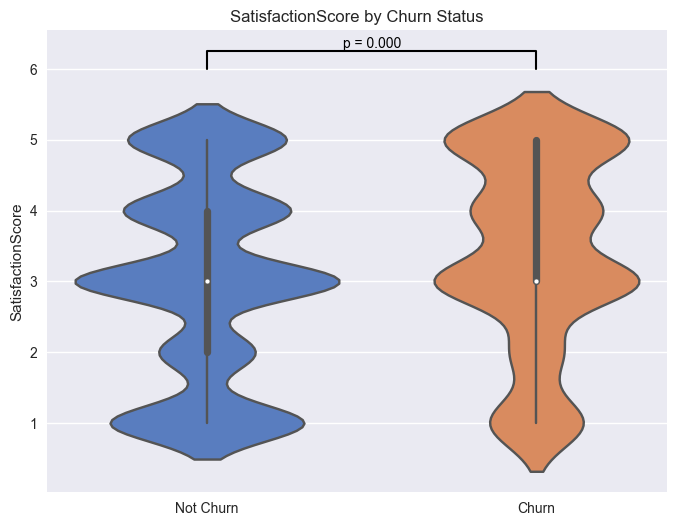

In [217]:
# calculate Mann-Whitney U test
churned = df[df['Churn'] == 1]['SatisfactionScore']
loyal = df[df['Churn'] == 0]['SatisfactionScore']
stat, p_value = mannwhitneyu(churned, loyal)

# make violin plt
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='Churn', y='SatisfactionScore', data=df, palette='muted')
ax.set_xticklabels(['Not Churn', 'Churn'])
plt.title('SatisfactionScore by Churn Status', fontsize=12)
plt.xlabel(None)

# add p-value
x1, x2 = 0, 1
y, h, col = df['SatisfactionScore'].max() + 1, 0.25, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, f"p = {p_value:.3f}", ha='center', va='bottom', color=col)

plt.show()

<div class="alert alert-block alert-warning">
<b>Summary</b><br>

- Churned customers tend to have lower tenure

- Higher WarehouseToHome distance is associated with more churn

- Lower satisfaction scores correlate with higher churn

- Churned customers have slightly higher OrderAmountHikeFromlastYear

- Non-churned customers tend to use more coupons
</div>

**Conclusions**
- In this section, our main objective is to understand the customer characteristics by investigating their demographics (`Gender`), personal behaviors (`Tenure`, `NumberOfDeviceRegistered`, `TimespendOnApp`), engagement metric (`SatisfactionScore`), product usage (`PreferredOrderCat`, `PreferredLoginDevice`), financial metrics (`OrderCount`, `CashbackAmount`, and `OrderAmountHikeFromlastYear`), temporal analysis (`DaySinceLastOrder` and `Tenure`).
- We found that customers who have shorter tenure, lower cashback amount, more complaints, and more device registered are more susceptible to churn.
- Moreover, churn and non-churn customers are statistically different in many ways: Churn customers have shorter tenure, higher satisfaction score, more numer of devices registered, lower cashback amount, and more complaints.

## **4 Modeling**

### **4.1 Experiment Setup**
- Restate the business goal and the modeling objective
- Elaborate how the primary metric works and justify its selection
- Explain how the experiments work
    - How many algorithms will be tested
    - What hyperparameter tuning technique will be involved
- Decide criteria to select the best model
- Explain how the best model works
- Simulate the financial costs of errors

## **References**

- Leys, C., Delacre, M., Mora, Y. L., Lakens, D., & Ley, C. (2019). How to classify, detect, and manage univariate and multivariate outliers, with emphasis on pre-registration. International Review of Social Psychology, 32(1). https://doi.org/10.5334/irsp.289 (GAJADI MASUK)
- Little, R. J. A. (1988). A Test of Missing Completely at Random for Multivariate Data with Missing Values. Journal of the American Statistical Association, 83(404), 1198–1202. https://doi.org/10.1080/01621459.1988.10478722
- Newman, D. A. (2014). Missing Data: Five Practical Guidelines. Organizational Research Methods, 17(4), 372-411. https://doi.org/10.1177/1094428114548590
- Sweidan, D., Johansson, U., Gidenstam, A., & Alenljung, B. (2022, December). Predicting customer churn in retailing. In 2022 21st IEEE International Conference on Machine Learning and Applications (ICMLA) (pp. 635-640). IEEE.

___

## **Dikeep Dulu**
### **1.1 Context**

**Stating from the original source:**

✅ The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

**What is E-commerce customer churn?**

✅ Customer churn constitutes a condition where customer choosing not to use a product/services, in the context of "An Online Retail E-commerce Company" because there is no statement regarding whether the company has offline store, then it is safe to assume there is "no offline store" and this Retail Company solely selling through online platform. 

Thus, we will tailor our problem's analysis as well solution and strategies in terms of online purchasing activity. 

**Why Such Things Can Happen?**

✅ There are several underlying factors, such as issues with:

1.   Services Quality
2.   Product Quality
3.   Retention Strategy that is not effective.

**Business Case of E-commerce:**

Importance of Addressing Customer Churn will Impact Revenue:
*   ✅ **Cost of Acquisition vs. Retention** : Acquiring a new customer is more expensive 
than retaining an existing one. High churn rates can lead to increased marketing and acquisition costs.

*   **Lifetime Value** : Loyal customers contribute more to the lifetime value (LTV), making churn prediction critical for sustaining revenue.

Justification :   (<span style='color:orange>This will be used for actionable insights for stakeholders</span>)
1.   Why Retaining existing customer cheaper than Customer Acquisition Cost (CAC).
* Factors and Reference :     
  *   **Trust** : Consumers tend to buy from brands they **trust**. This is why it takes a lot more effort to convert a new customer than to hold a loyal one. It can be due to **good customer service**, **ease of use** or **simply because the product solved their problem effectively**. [Forbes](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/) 
  *   **More likelihood to Purchase** : Studies show that existing customers are 50% more likely to try new products and spend 31% more than new customers. [Forbes](https://www.forbes.com/sites/forbesagencycouncil/2020/01/29/the-value-of-investing-in-loyal-customers/?sh=1f4d77a21f6b)



2.   Online Retail Company of Cost of Acquiring Customers(CAC).
  * ✅ The average CAC varies across industries. For eCommerce businesses: $70. [Average Customer Acquisition Cost](https://userpilot.com/blog/average-customer-acquisition-cost/)

  *  Some of the larger companies, like Amazon and eBay, pay between 150 dollars and 200 dollars per customer. For smaller online stores, however, this figure is generally closer to $20 per customer.[Average Customer Acquisition in E-Commerce](https://beprofit.co/a/blog/the-customer-acquisition-cost-in-e-commerce-and-industry)

  * Average spend advertising in top a few retail industries: 
  Ecommerce (as a whole): $68 [Customer acquisition cost statistics](https://www.lightspeedhq.com/blog/customer-acquisition-cost/)

### **1.2 Problem Statement**

**Business Problem Statement:**

✅ `How to predict whether customer will churn (stop using product product/services), so we can provide appropriate strategy to retain existing customers.`

**Machine Learning System Objective :** 

  * Input : Customer informations.
  * Output : Whether customer will likely to churn or not.
  * Objective Function : Minimize the difference between "Predicted churn" and "Actual churn".
   
### **1.3 Analytical Approach**
### **1.4 Metrics**
### **1.5 Dataset**
The dataset which was in an Excel file format was obtained from [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data). This file consists of two sheets, `Data Dict` (information about each column in the dataset) and `E Comm` (the dataset).
- `CustomerID`: Unique customer ID
- `Churn`: Churn status
- `Tenure`: Tenure of customer in organization
- `PreferredLoginDevie`: Preferred login device of customer
- `CityTier`: City tier
- `WarehouseToHome`: Distance between warehouse to home of customer
- `PreferredPaymentMode`: Preferred payment method of customer
- `Gender`: Gender of customer
- `HourSpendOnApp`: Number of hours spent on mobile app or website
- `NumberOfDeviceRegistered`: Total number of devices registered by a customer
- `PreferedOrderCat`: Preferred order category of customer in last month
- `SatisfactionScore`: Satisfaction score of customer on service
- `MaritalStatus`: Marital status of customer
- `NumberOfAddress`: Total number of address of customer
- `Complain`: Complaint raised in last month
- `OrderAmountHikeFromlastYear`: Percentage of increases in order from last year
- `CouponUsed`: Total number of coupon has been used in last month
- `DaySinceLastOrder`: Day since last order by customer
- `CashbackAmount`: Average cashback in last month

Kindly note whether or not all variables will be used for a data analysis and data modeling will be determined based on the findings during the data exploration. Variables with moderate to high correlations, for example, will be excluded for the next stages to avoid problems in the modeling phase.

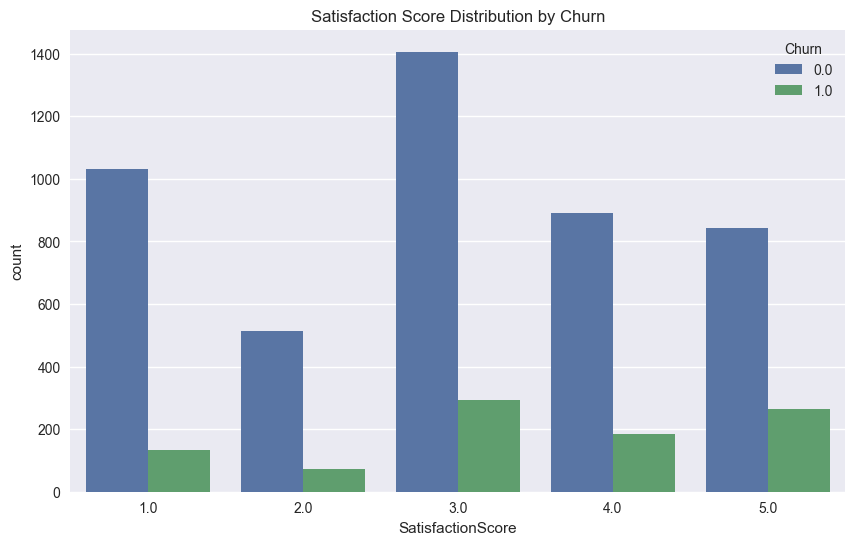

In [ ]:
# Analyze satisfaction score distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='SatisfactionScore', hue='Churn', data=df)
plt.title('Satisfaction Score Distribution by Churn')
plt.show()

Factors correlated with Satisfaction Score:
SatisfactionScore    1.000000
Churn                0.105481
NumberOfAddress      0.053583
HourSpendOnApp       0.033180
DaySinceLastOrder    0.028337
CouponUsed           0.026463
OrderCount           0.022600
WarehouseToHome      0.007409
CashbackAmount       0.003473
CityTier            -0.011554
Name: SatisfactionScore, dtype: float64
Churn rate by Satisfaction Score:
   SatisfactionScore     Churn
0                1.0  0.115120
1                2.0  0.126280
2                3.0  0.171967
3                4.0  0.171322
4                5.0  0.238267


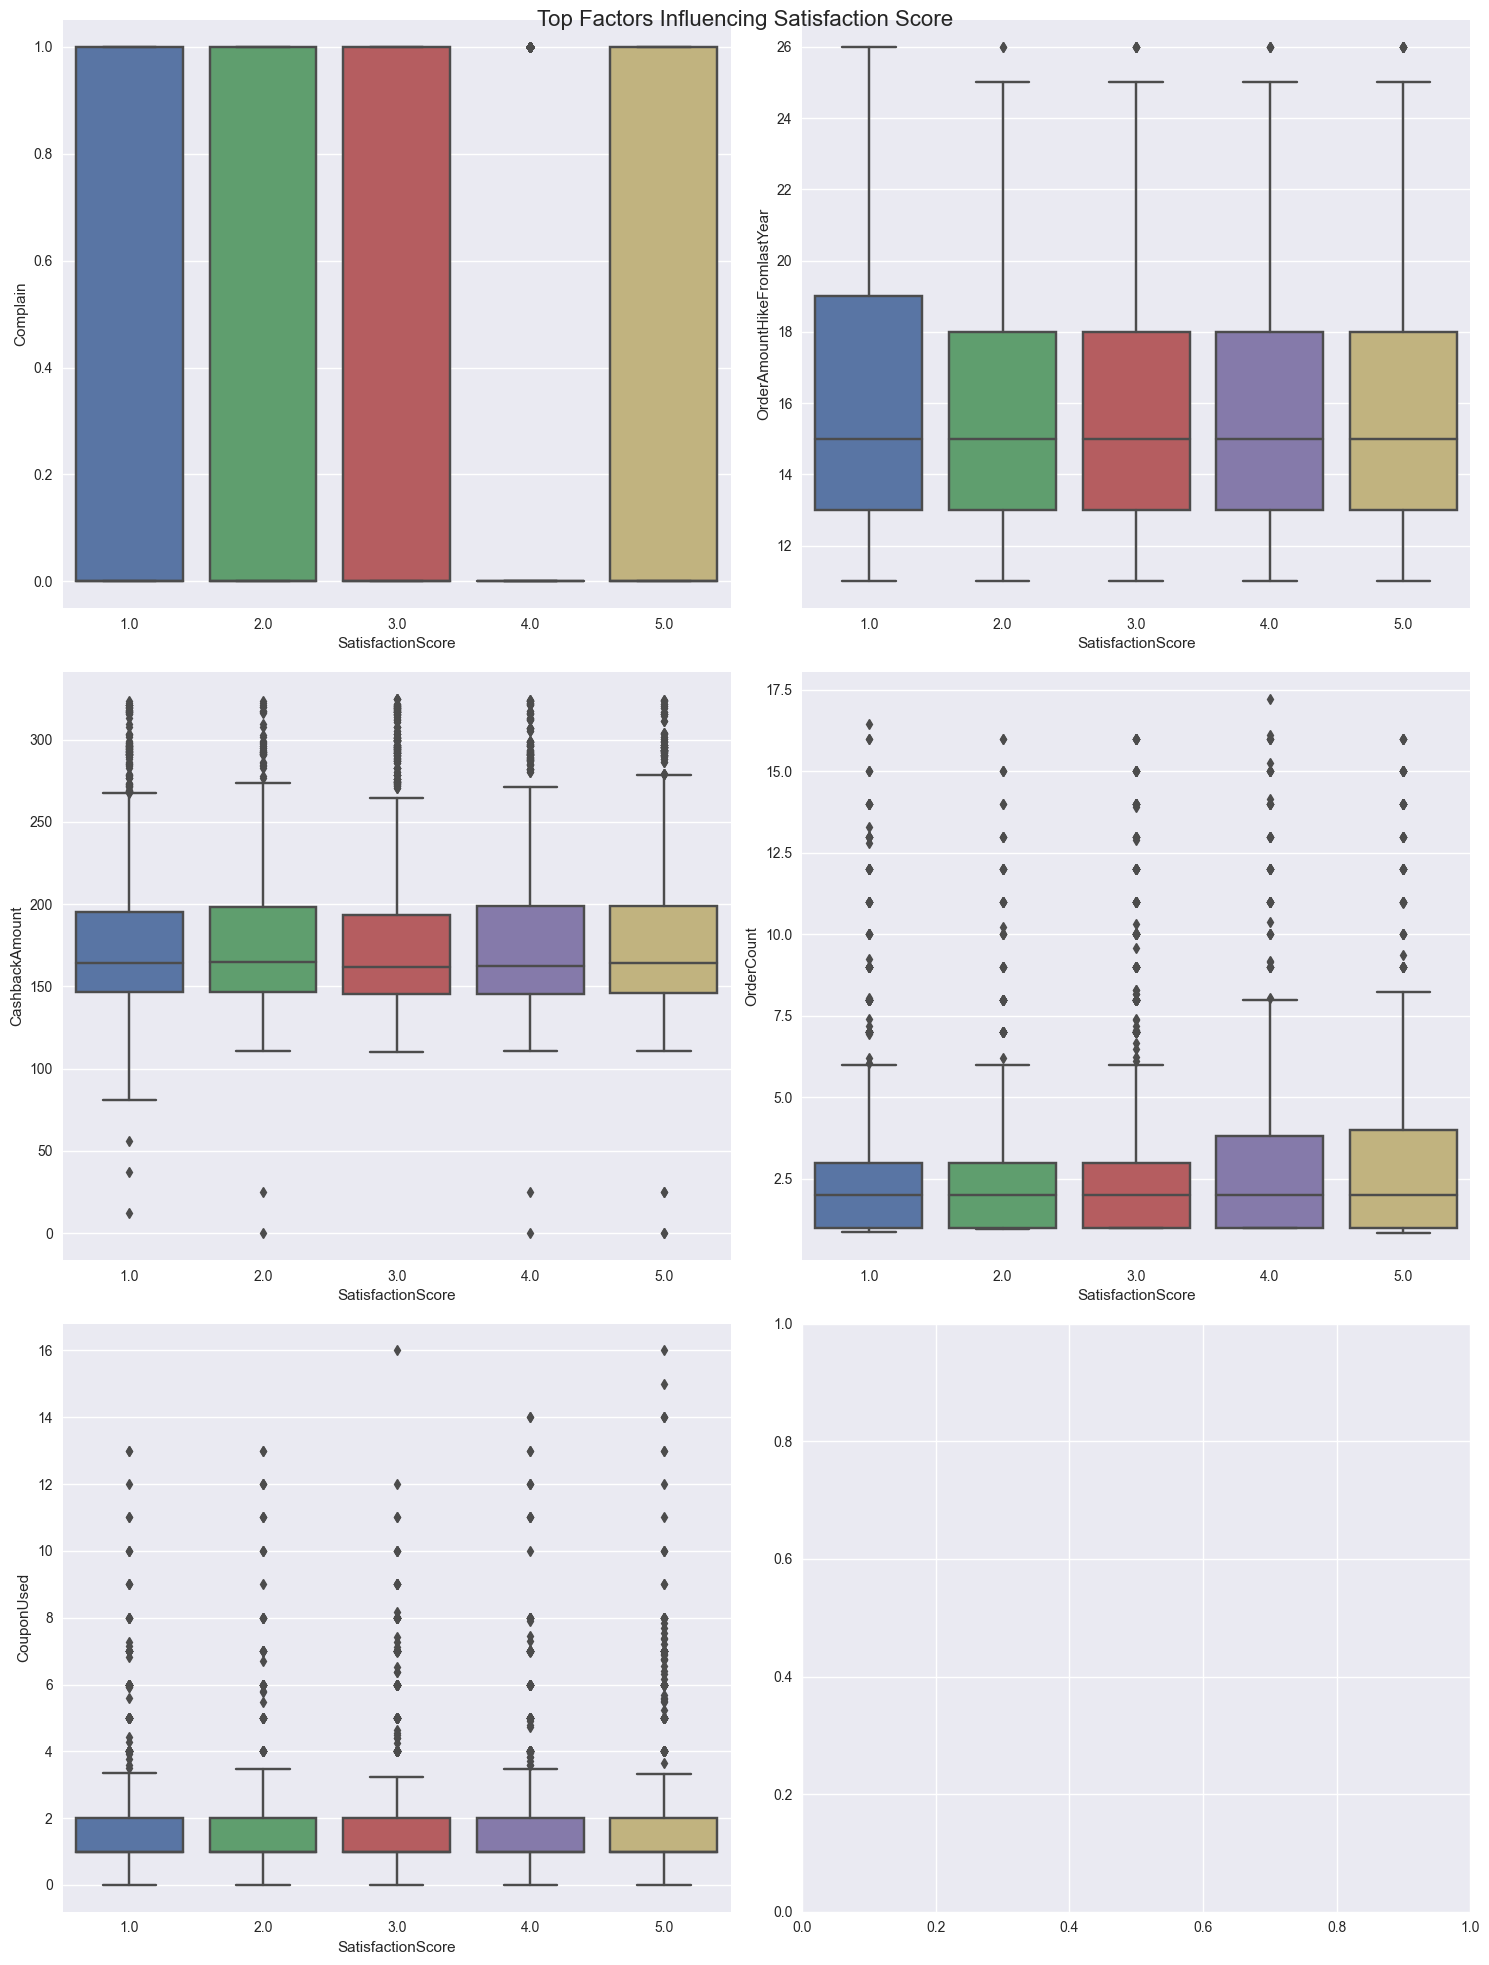

In [ ]:
# Correlation between satisfaction score and other factors
satisfaction_corr = df.corr(numeric_only=True)['SatisfactionScore'].sort_values(ascending=False)
print("Factors correlated with Satisfaction Score:")
print(satisfaction_corr.head(10))

# Analyze churn rate by satisfaction score
churn_by_satisfaction = df.groupby('SatisfactionScore')['Churn'].mean(numeric_only=True).reset_index()
print("\
Churn rate by Satisfaction Score:")
print(churn_by_satisfaction)

# Analyze top factors influencing satisfaction
top_factors = ['Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'OrderCount', 'CouponUsed']
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Top Factors Influencing Satisfaction Score', fontsize=16)

for i, factor in enumerate(top_factors):
    sns.boxplot(x='SatisfactionScore', y=factor, data=df, ax=axes[i//2, i%2])

plt.tight_layout()

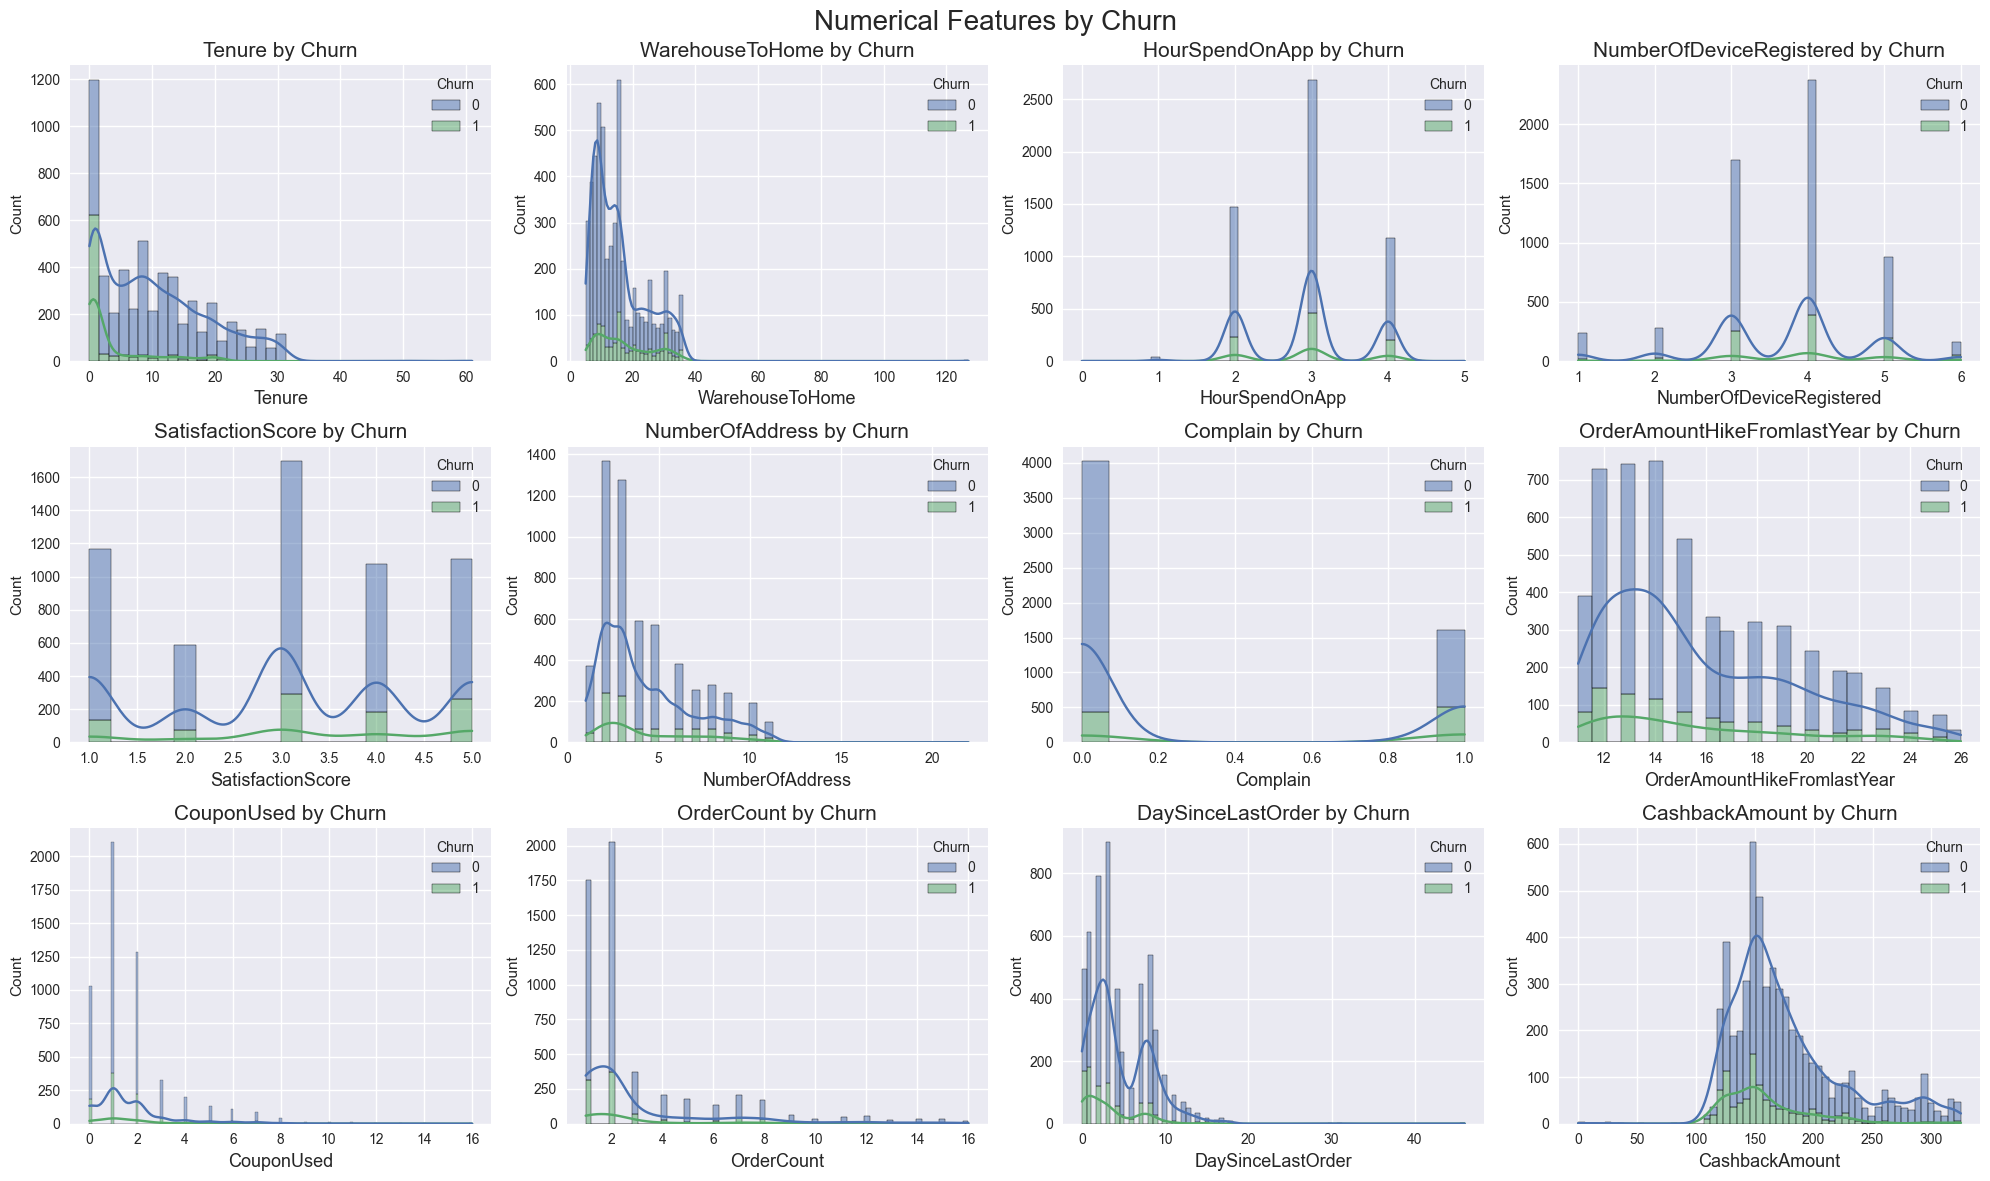

In [ ]:
plt.figure(figsize=(20, 12))
plt.suptitle('Numerical Features by Churn', fontsize=20)

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i) 
    sns.histplot(data=data, x=column, hue='Churn', multiple='stack', kde=True)
    plt.title(f'{column} by Churn', fontsize=15)
    plt.xlabel(column, fontsize=13)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# create function to winsorize extreme values
def winsorize(data, lower_percentile=0.15, upper_percentile=0.85):
    lower_limit = data.quantile(lower_percentile)
    upper_limit = data.quantile(upper_percentile)
    data_cleaned = data.clip(lower=lower_limit, upper=upper_limit)
    return data_cleaned

# specify cols to winsorize
col_to_winsorize = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                    'NumberOfDeviceRegistered', 'NumberOfAddress', 
                    'OrderAmountHikeFromlastYear', 'CouponUsed', 
                    'OrderCount', 'DaySinceLastOrder', 
                    'CashbackAmount'    
]
winsorized_data = df.copy()
# perform winsorization to defined vars
for col in col_to_winsorize:
    winsorized_data[col] = winsorize(df[col])

# evaluate winsorization result
for col in df[col_to_winsorize]:
    detect_outliers(winsorized_data, col)

The number of outliers in 'Tenure' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'WarehouseToHome' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'HourSpendOnApp' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'NumberOfDeviceRegistered' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'NumberOfAddress' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'OrderAmountHikeFromlastYear' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'CouponUsed' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'OrderCount' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'DaySinceLastOrder' is 0 or 0.00% of the total data (5630 rows).
The number of outliers in 'CashbackAmount' is 0 or 0.00% of the total data (5630 rows).
